I. Set Up

In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
# CUSTOM Imports
from pre_ml_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[1],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', index=1, options=('All', 'Bona'), value='Bona')

II. Data Preparation

In [2]:
# Set ID
set_id = set_widget.value
# Create region filtered files 
region_filter_fun(global_path,set_id)
# Create eventfile table
create_eventfilestable_fun(global_path,set_id)
# Combine all property tables with each other
dfp_list =[]
for prop_filename in glob.iglob(f'{global_path}/{set_id}/properties-{set_id}-*.csv'):
   dfp = pd.read_csv(prop_filename)
   dfp_list.append(dfp)
df_properties = pd.concat(dfp_list)
df_properties.to_csv(f'{global_path}/{set_id}/properties-{set_id}.csv',index=False)

# Reduce data for useful input to data representation
df_eventfiles = pd.read_csv(f'{global_path}/{set_id}/eventfiles-{set_id}.csv')
df_properties = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_eventfiles_input, df_properties_input = data_reduction_fun(df_eventfiles, df_properties,global_path,set_id)



/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14927_000N021_e2_r0312_regevt3_filtered.fits.gz already exists!
/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13833_000N021_e2_r0384_regevt3_filtered.fits.gz already exists!
/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf00310_000N021_r0293_regevt3_filtered.fits.gz already exists!
/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf12160_001N021_e2_r0384_regevt3_filtered.fits.gz already exists!
/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf08193_000N021_e2_r0398_regevt3_filtered.fits.gz already exists!
/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf01581_000N021_r0384_regevt3_filtered.fits.gz already exists!
/Users/ste

III. Show Bona-fide Examples

In [3]:
from matplotlib.colors import LogNorm
from sherpa.astro import ui
# Set ID
set_id = set_widget.value

df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')

df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

print("ObsID and RegID: ", df_eventfiles_group.groups.keys())

Number of Eventfiles:  17
Number of Property Sets:  17
ObsID and RegID:  dict_keys(['10822_185', '10921_3', '10969_216', '10995_21', '10996_27', '10996_5', '11013_34', '11104_129', '13682_9', '13814_176', '13814_567', '14436_54', '14538_5', '2833_53', '2896_129', '9109_333', '9109_344'])


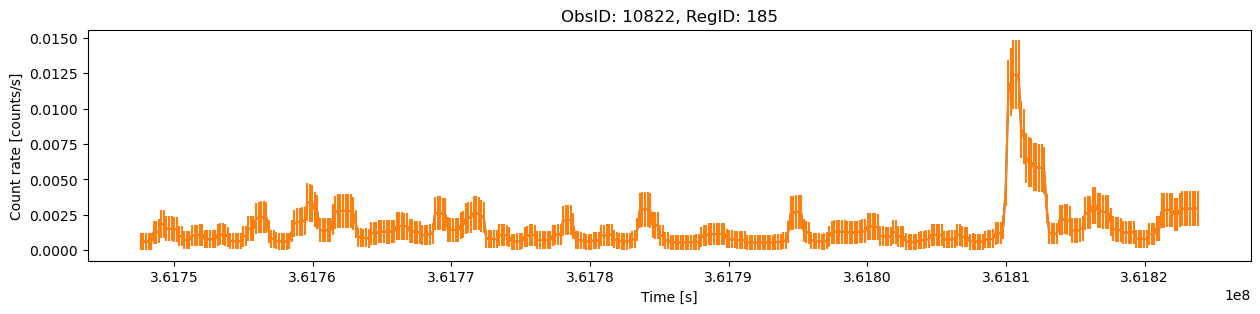

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10822_000N022_r0185_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10822_000N022_r0185_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10822_000N023_r0185_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


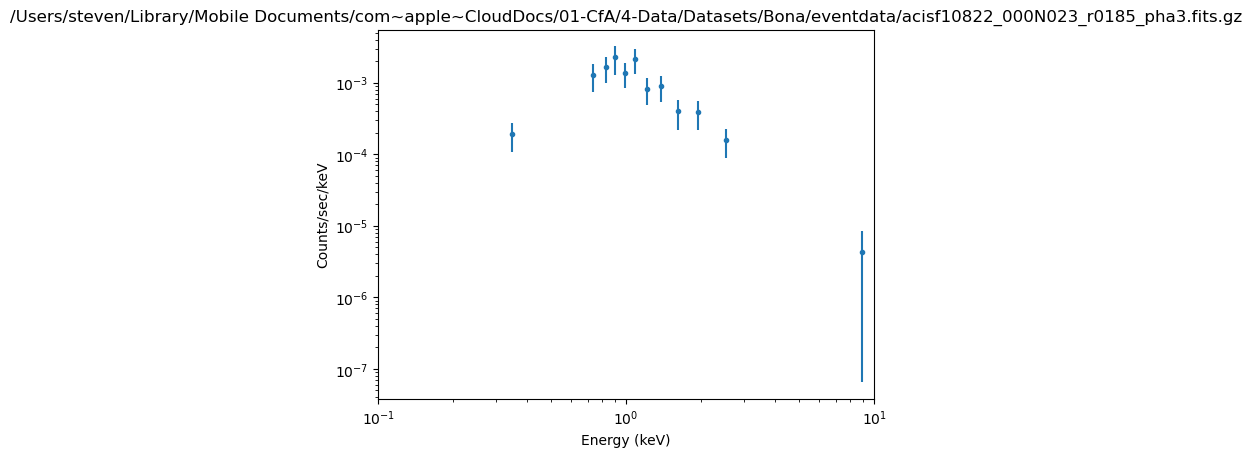

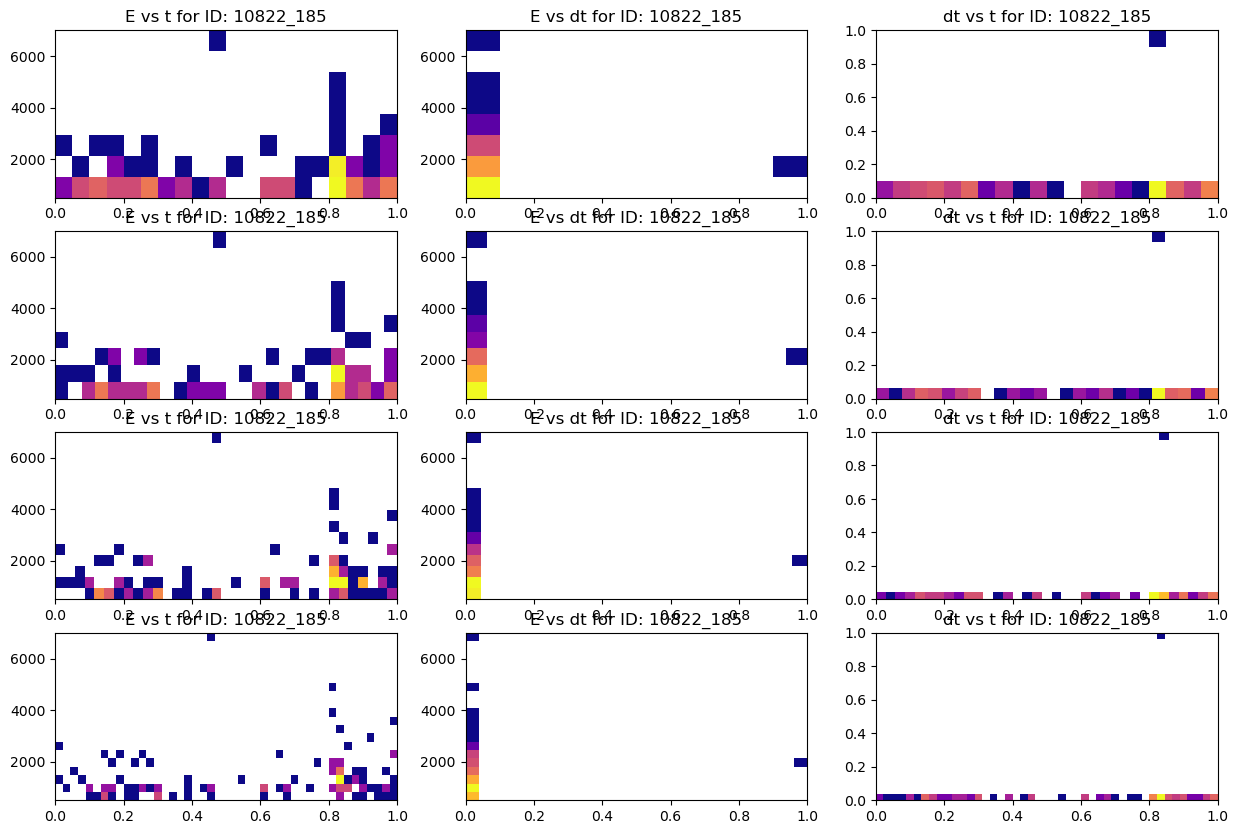

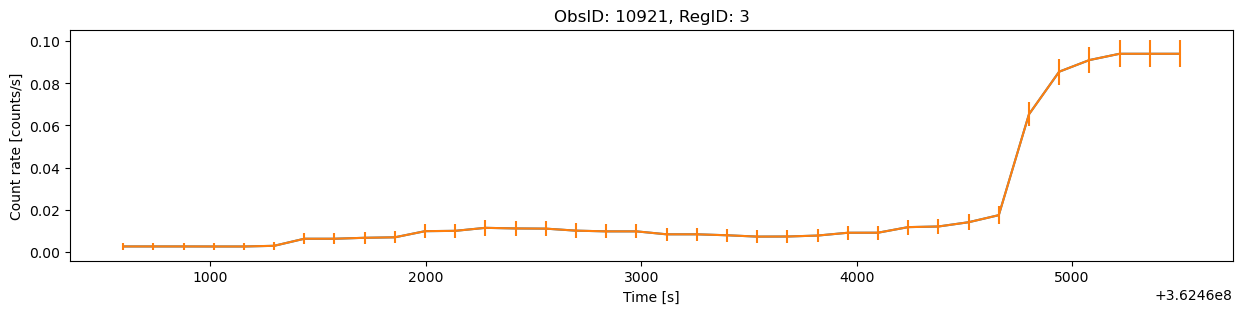

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10921_001N022_r0003_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10921_001N022_r0003_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10921_001N023_r0003_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


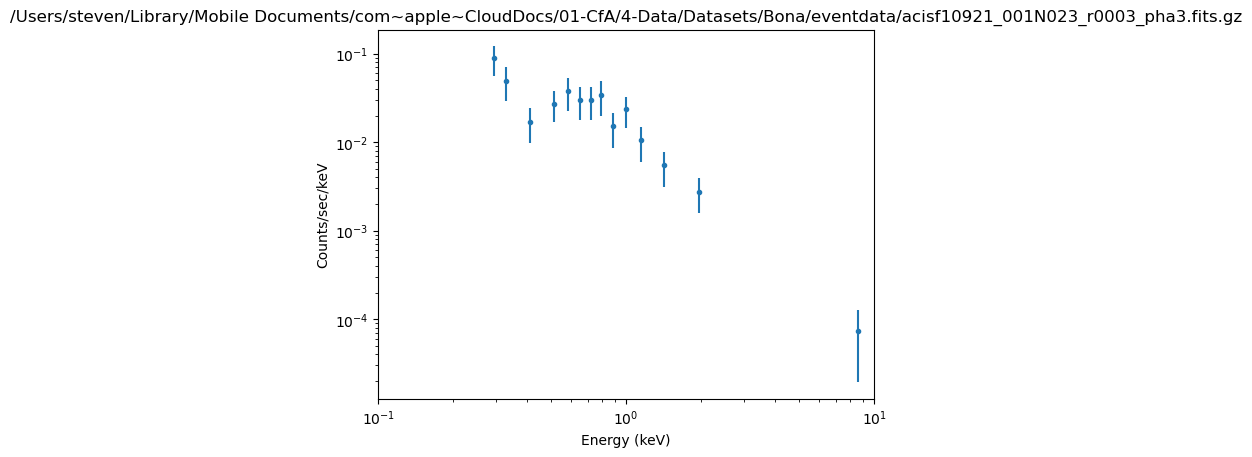

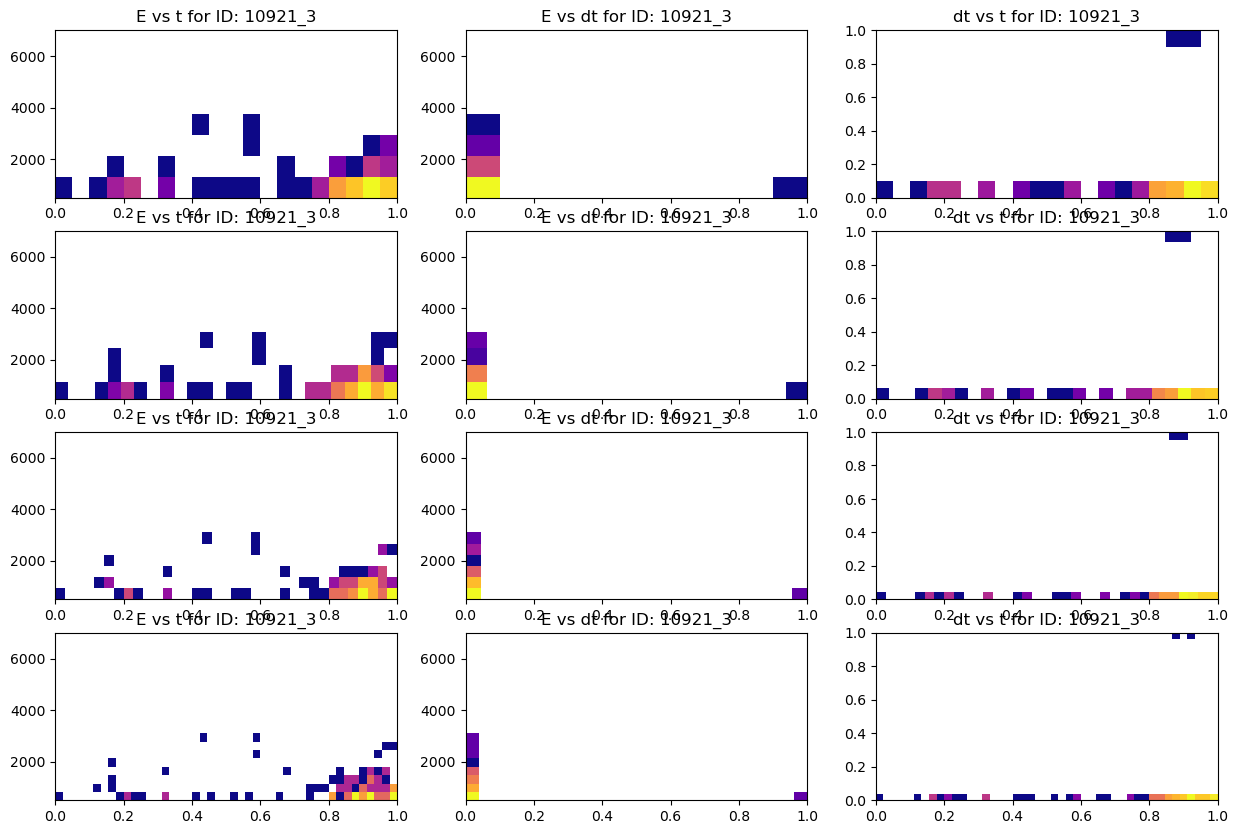

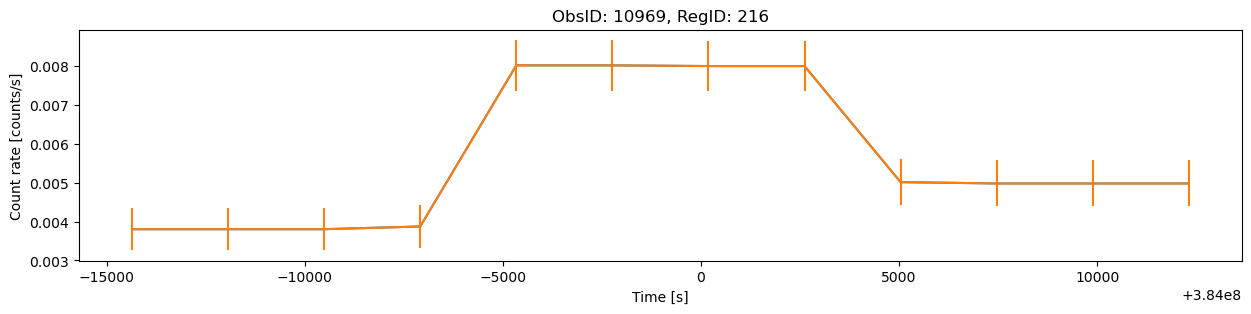

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10969_000N021_r0216_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10969_000N021_r0216_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10969_000N022_r0216_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


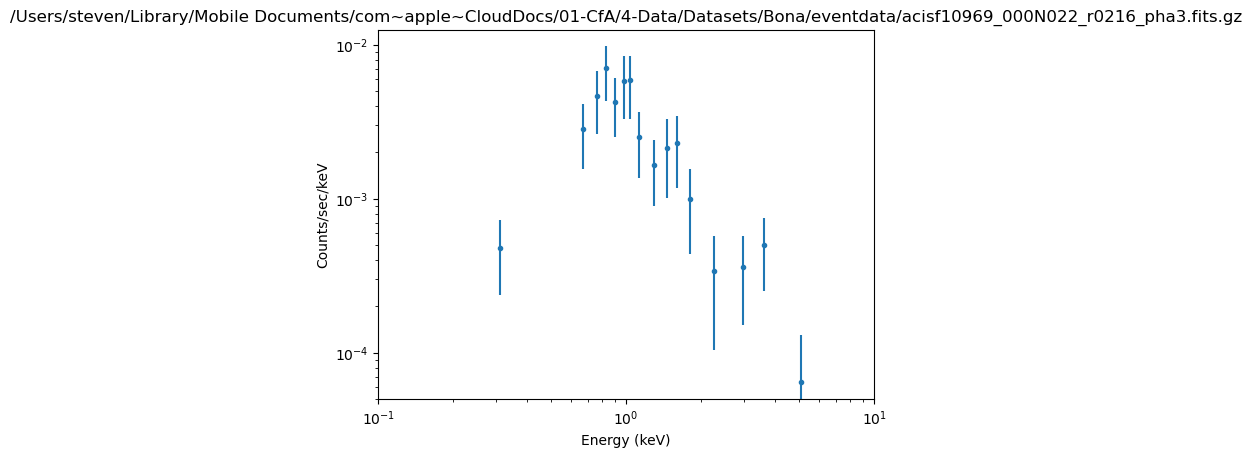

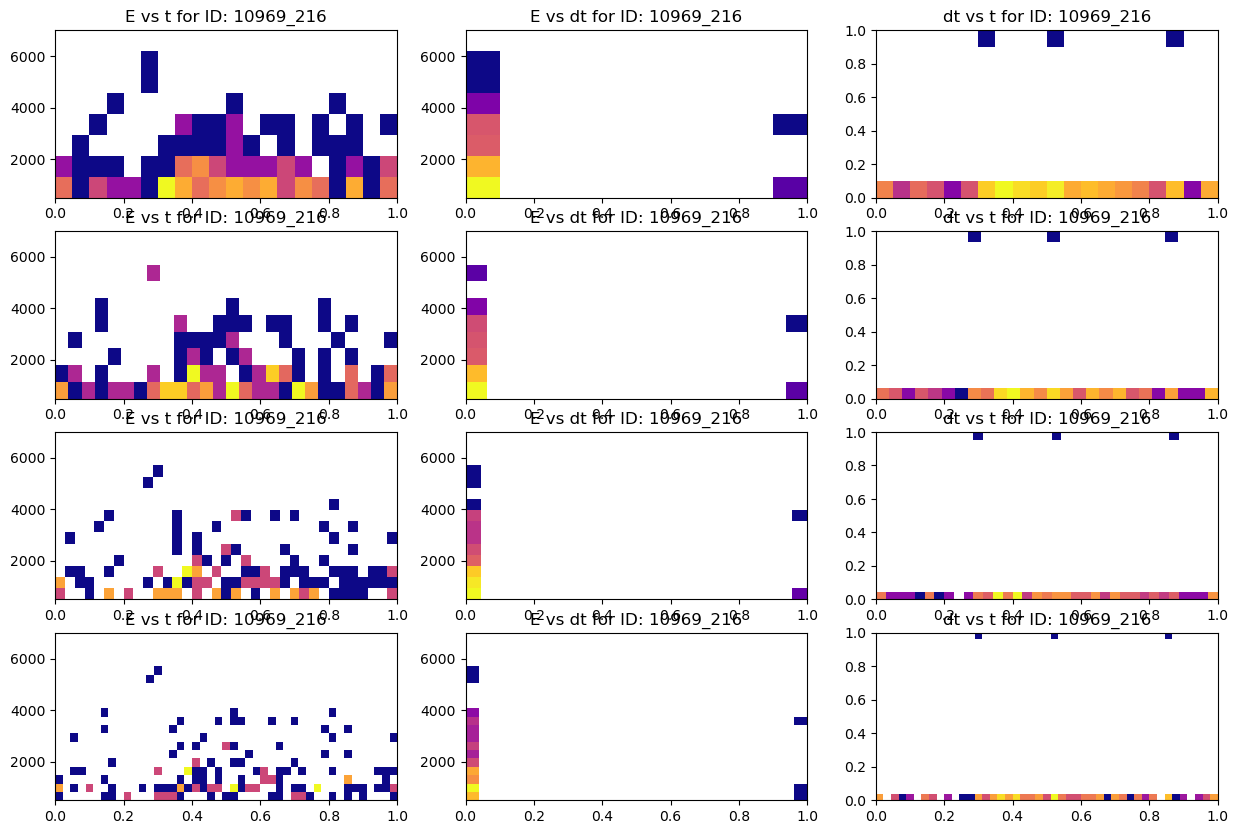

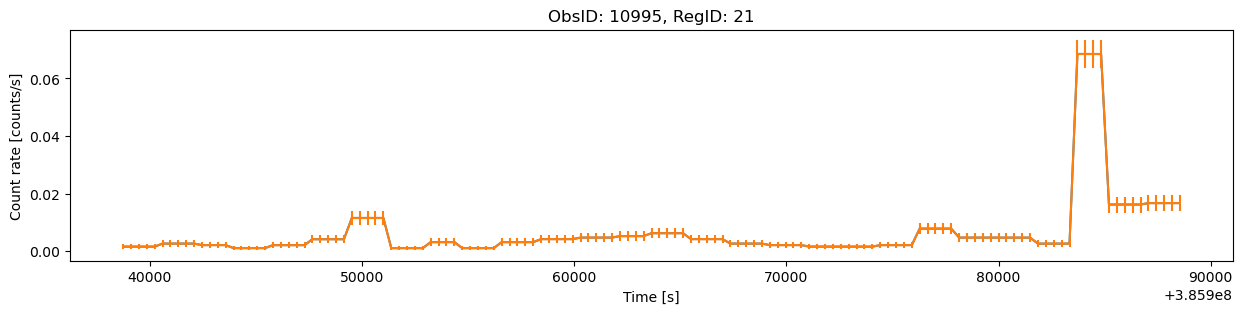

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10995_001N022_r0021_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10995_001N022_r0021_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10995_001N023_r0021_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


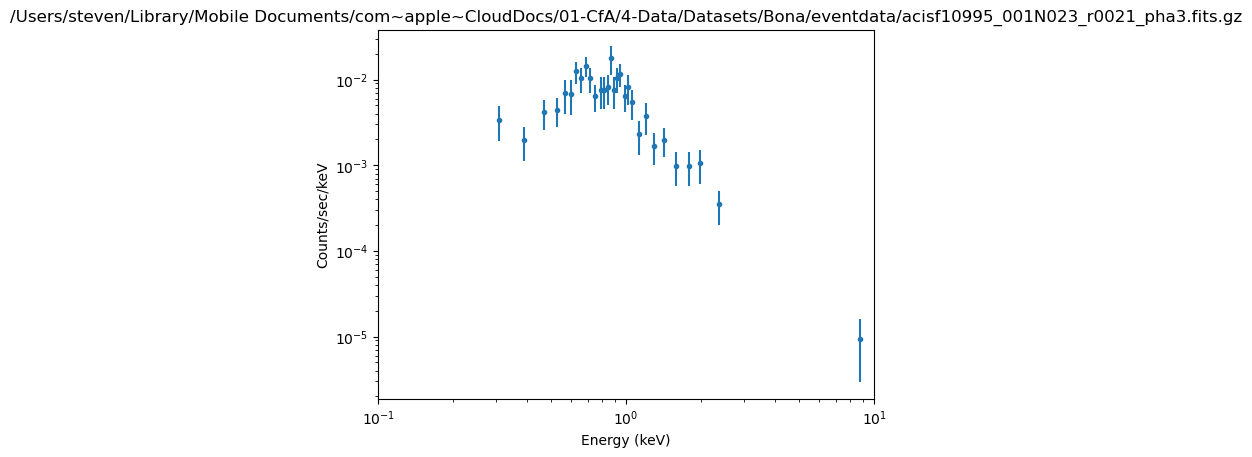

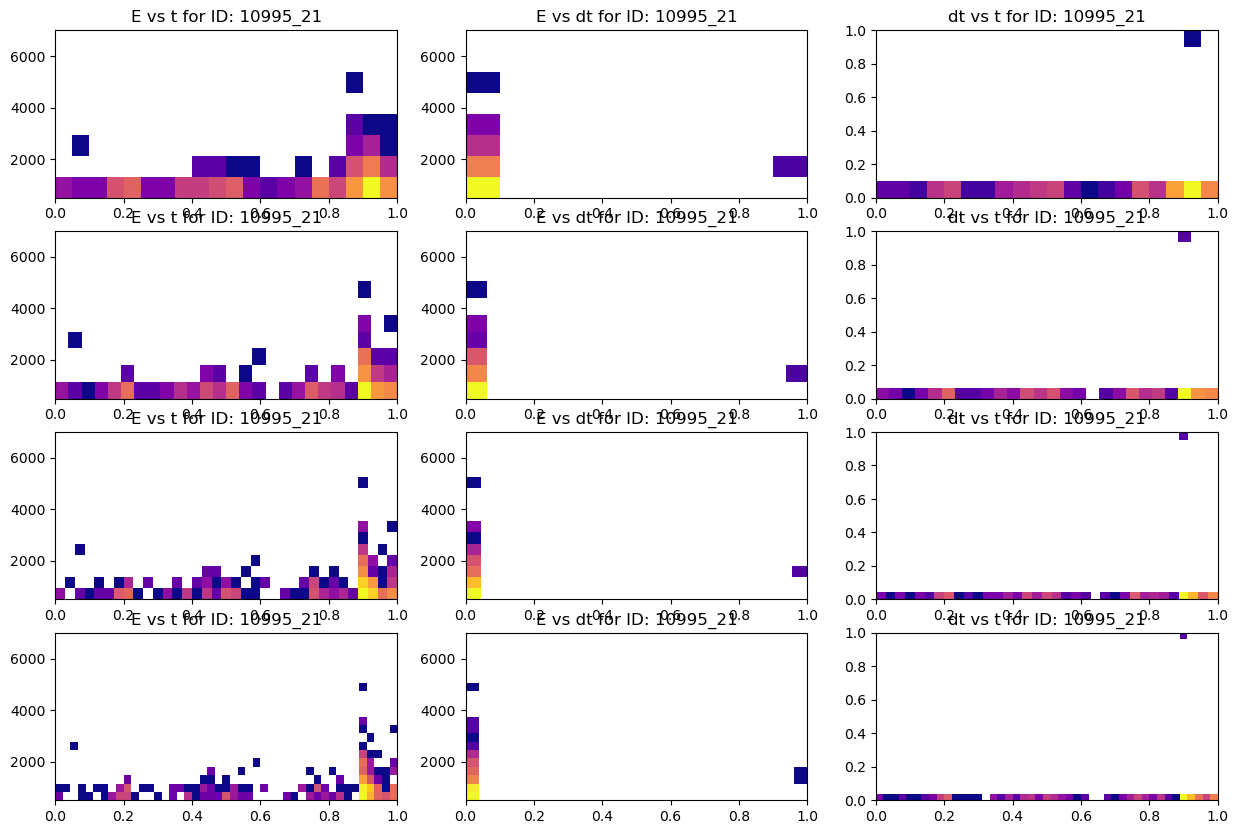

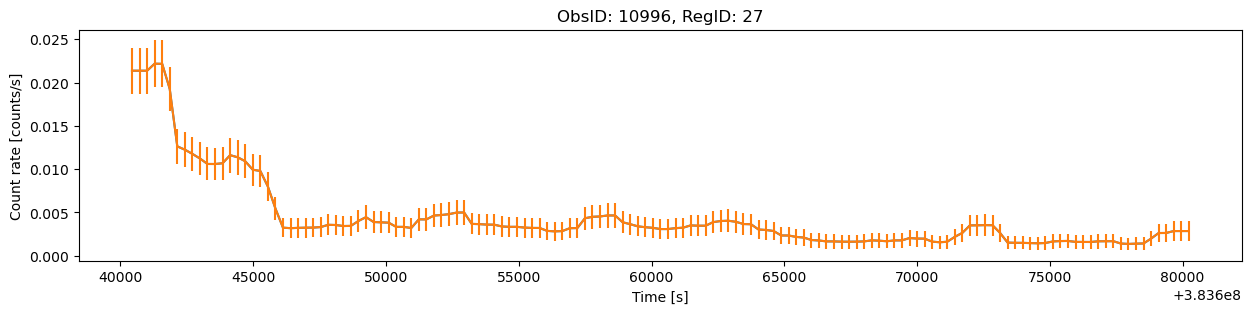

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10996_000N021_r0027_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10996_000N021_r0027_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10996_000N022_r0027_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


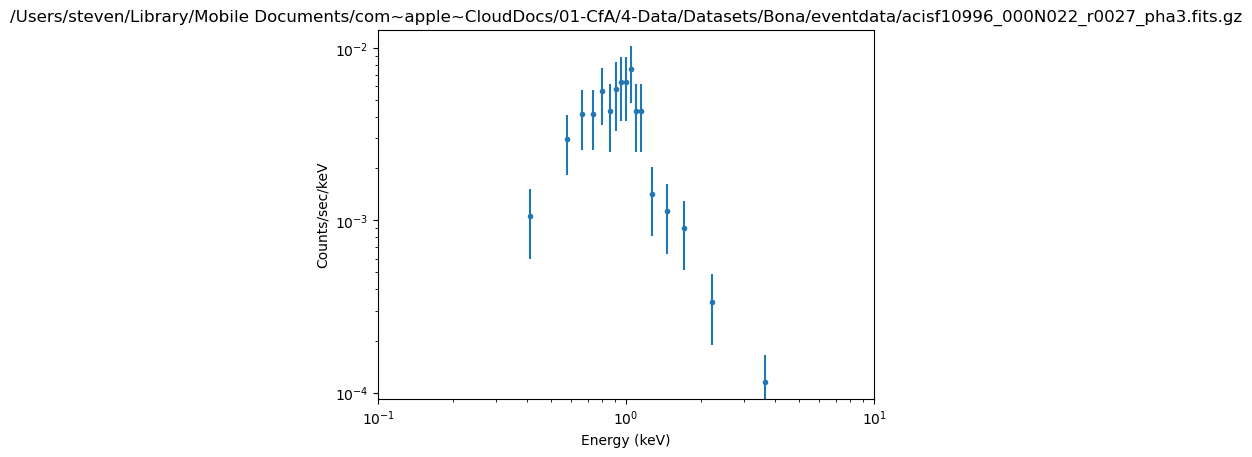

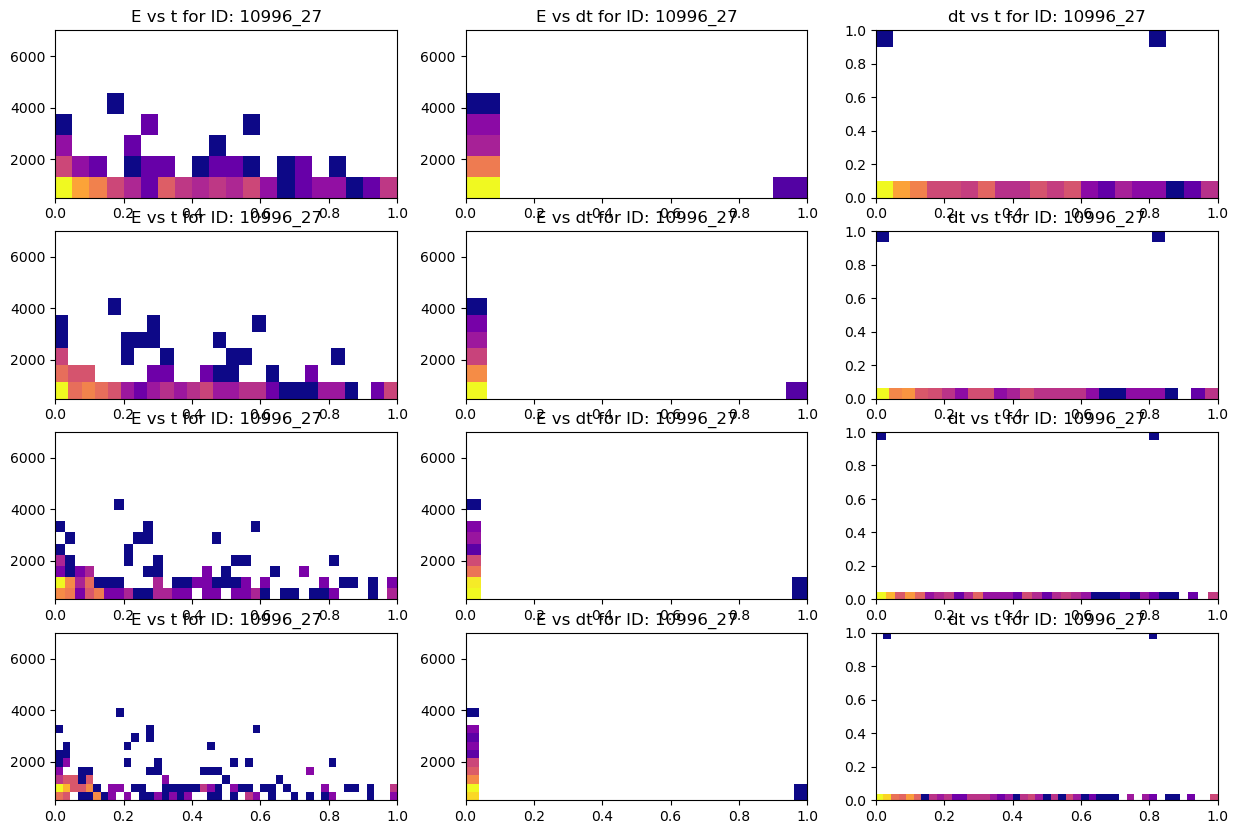

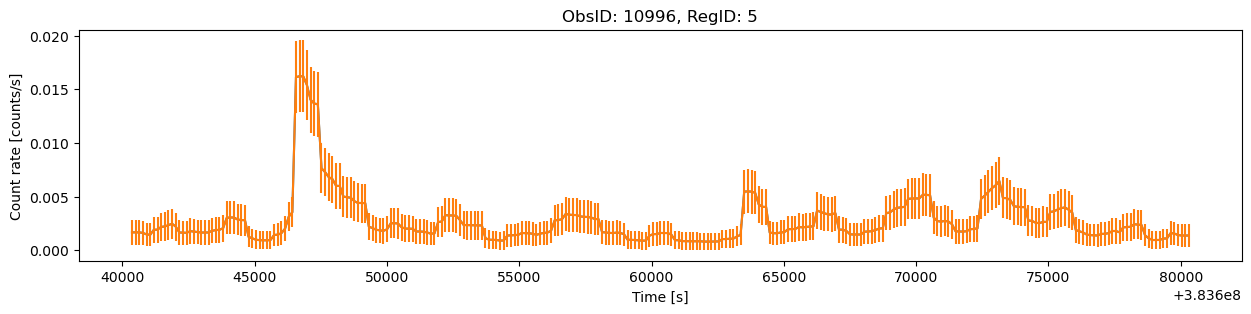

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10996_000N021_r0005_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10996_000N021_r0005_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf10996_000N022_r0005_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


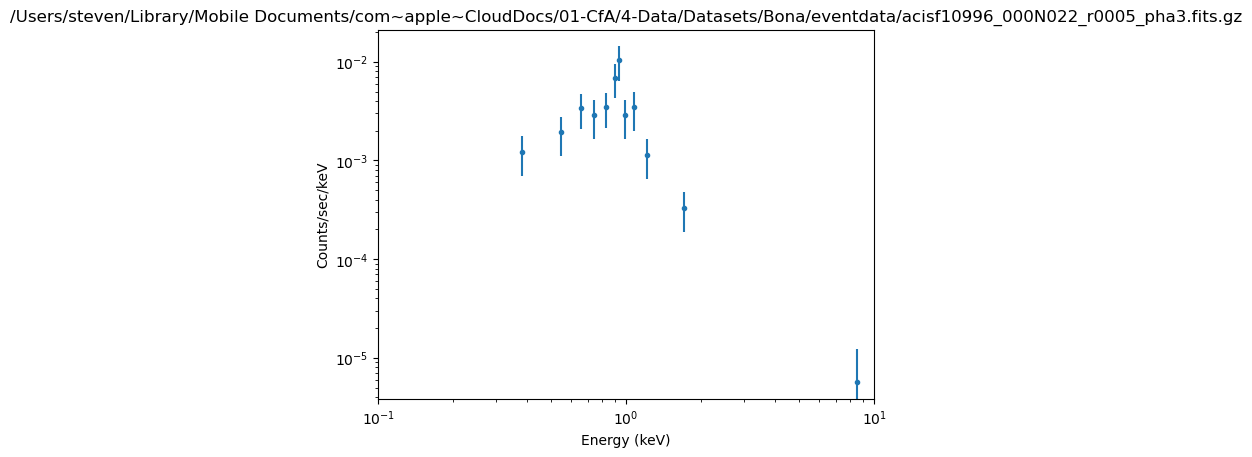

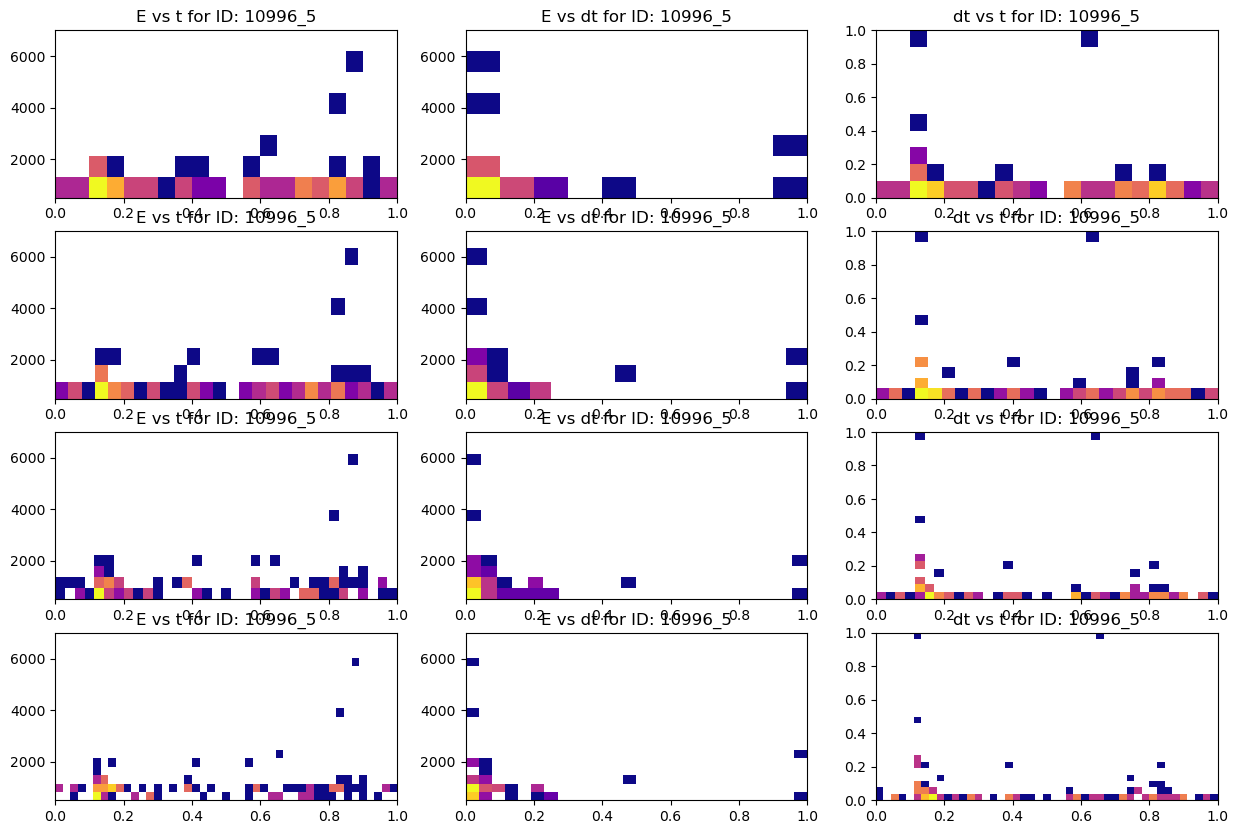

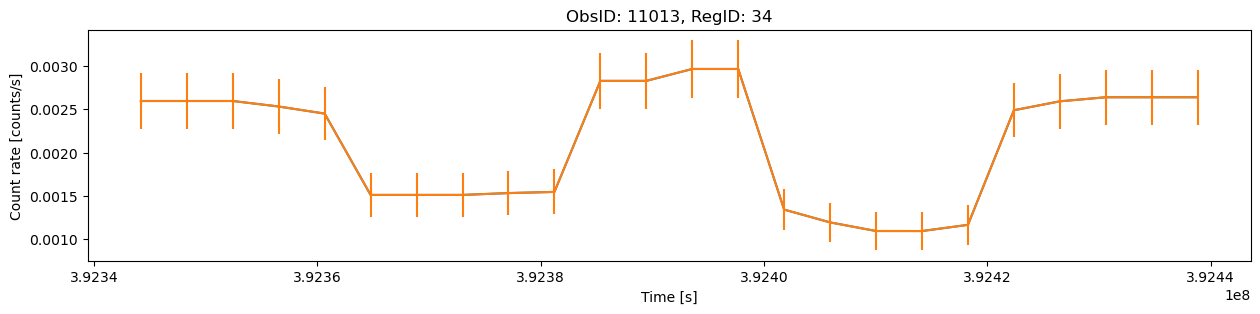

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf11013_000N023_r0034_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf11013_000N023_r0034_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf11013_000N024_r0034_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


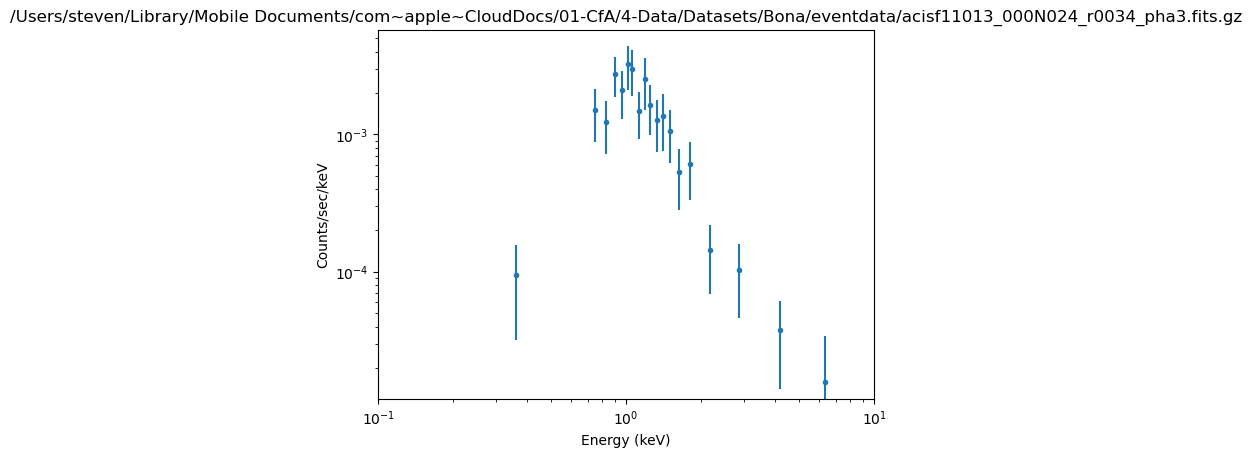

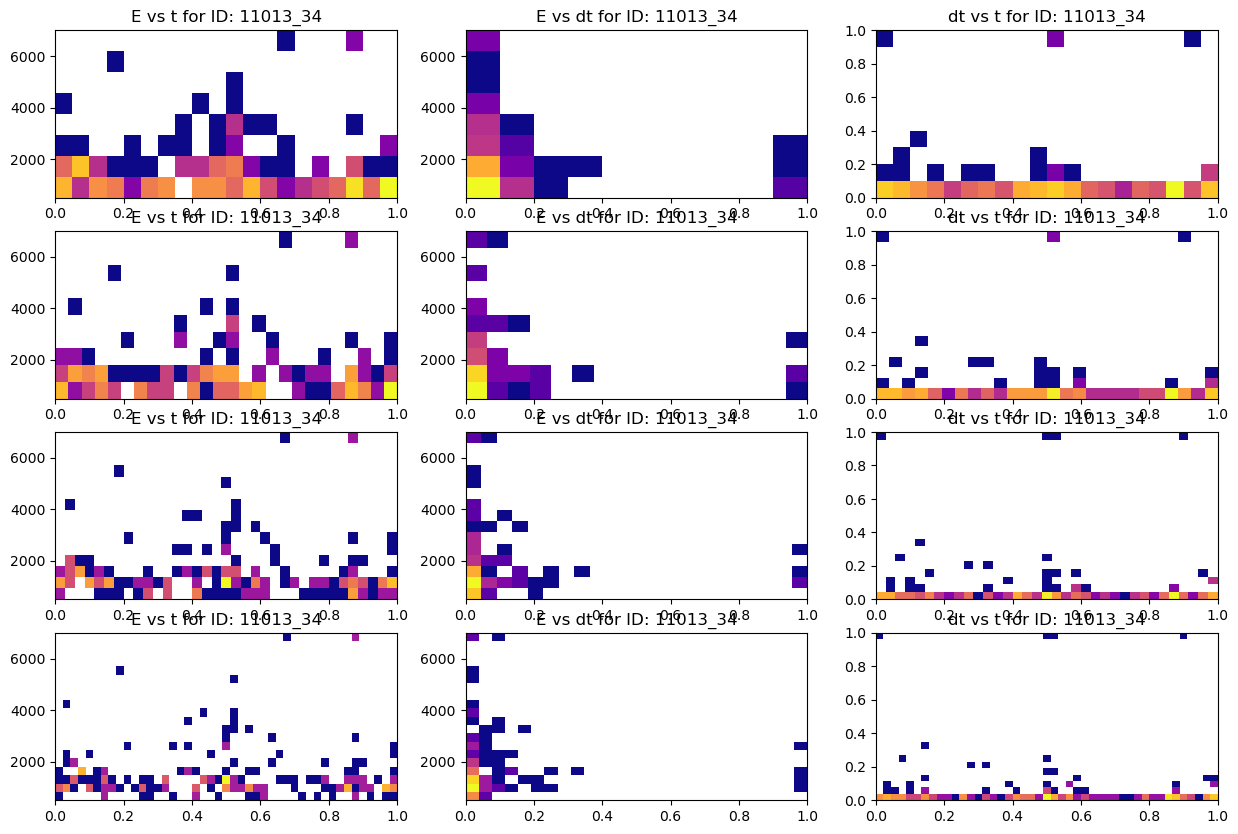

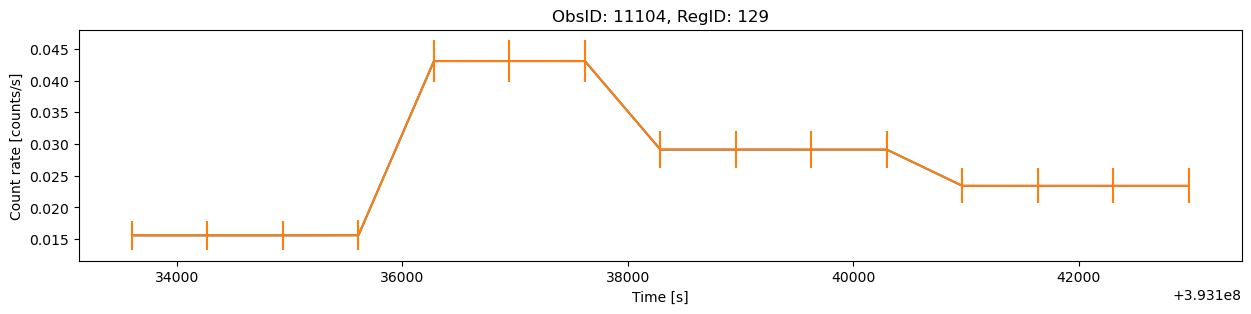

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf11104_000N021_r0129_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf11104_000N021_r0129_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf11104_000N022_r0129_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


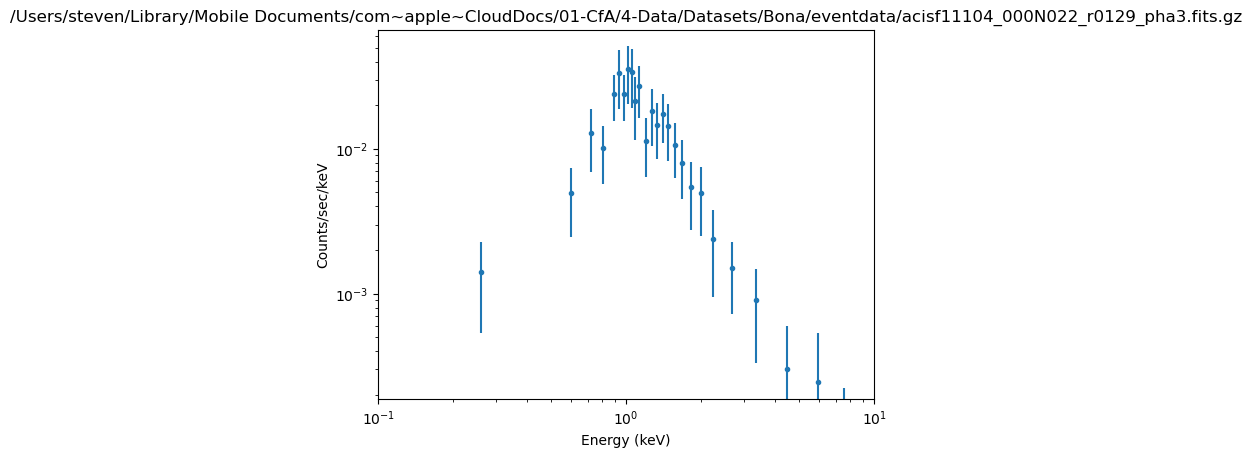

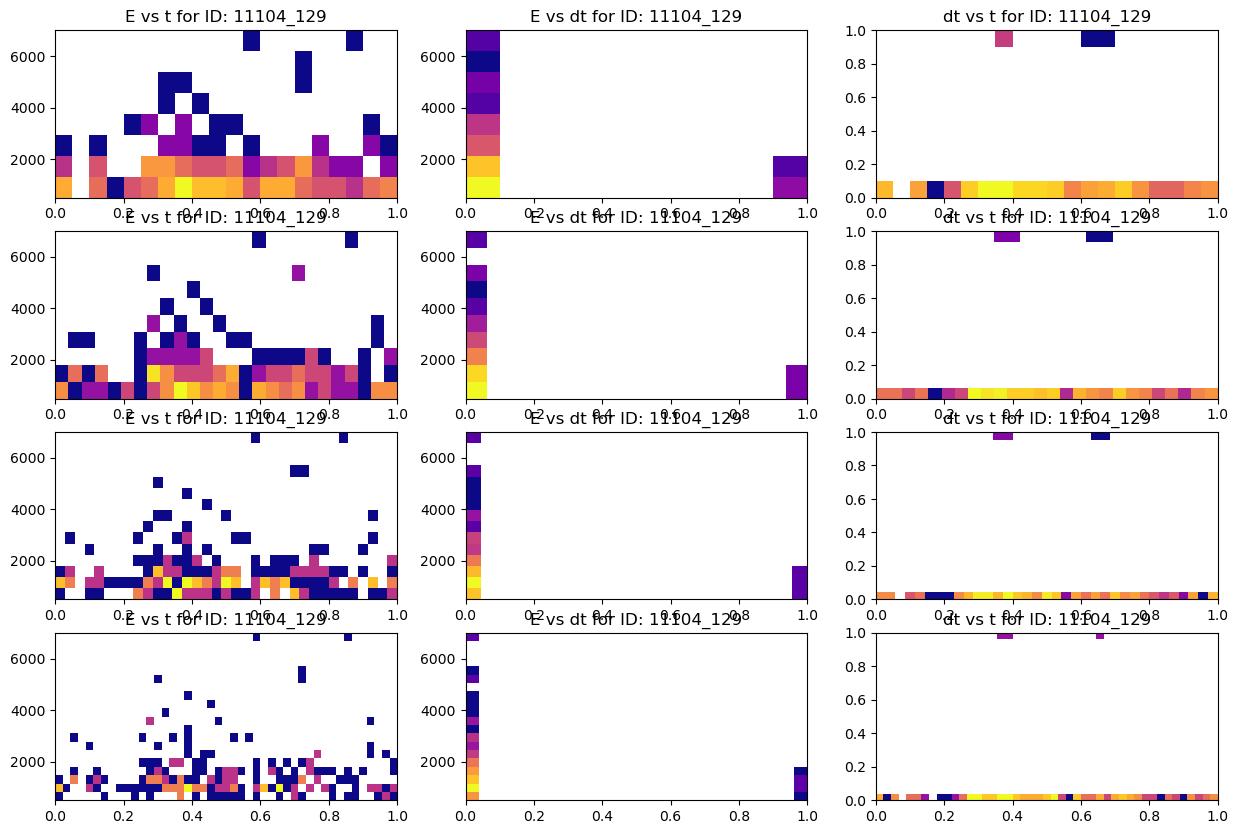

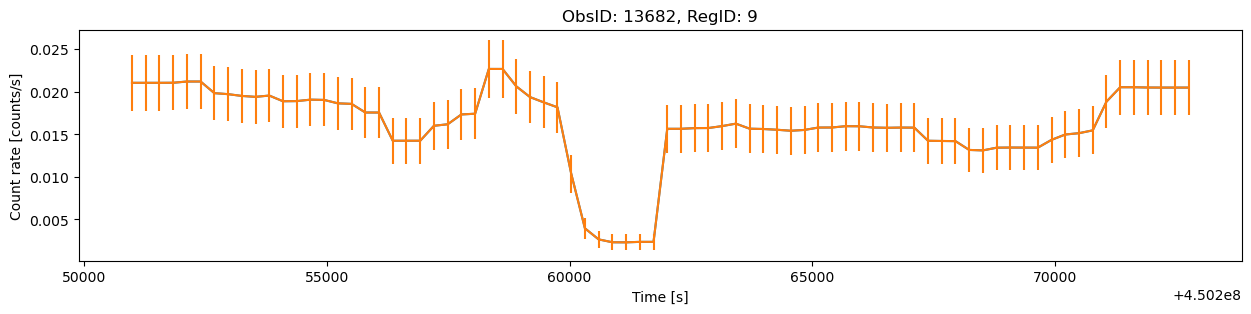

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13682_001N022_r0009_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13682_001N022_r0009_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13682_001N023_r0009_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


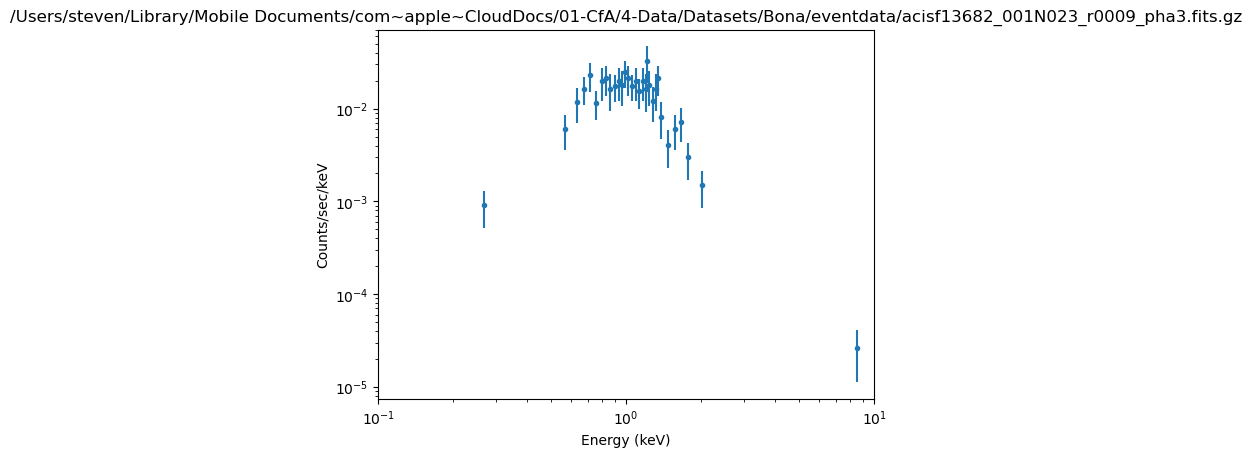

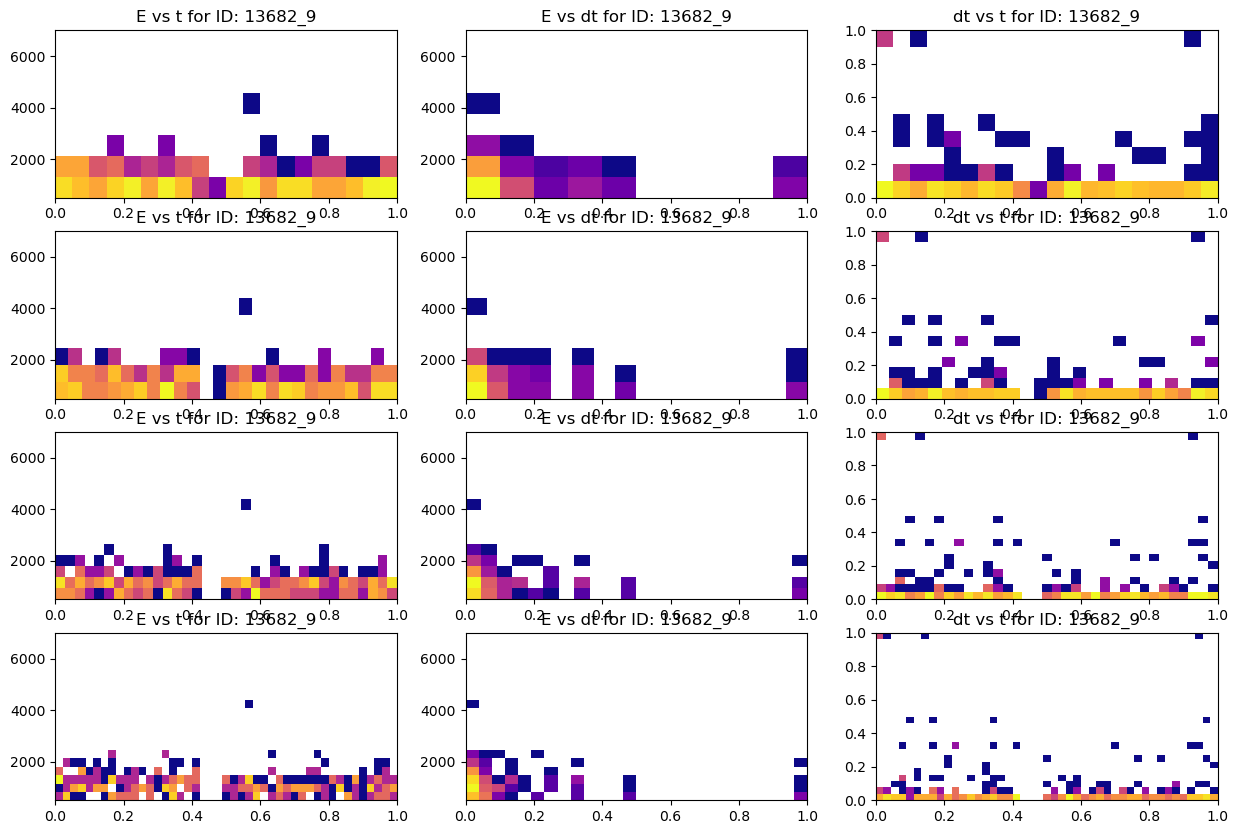

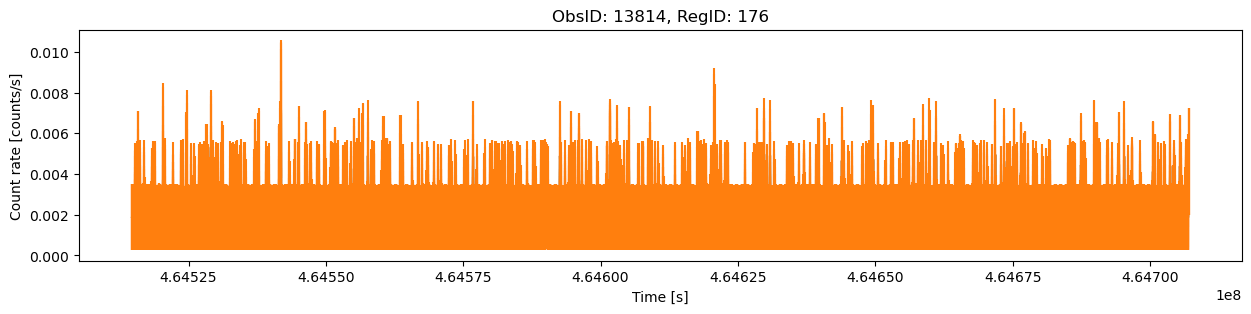

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13814_000N021_r0176_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13814_000N021_r0176_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13814_000N022_r0176_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


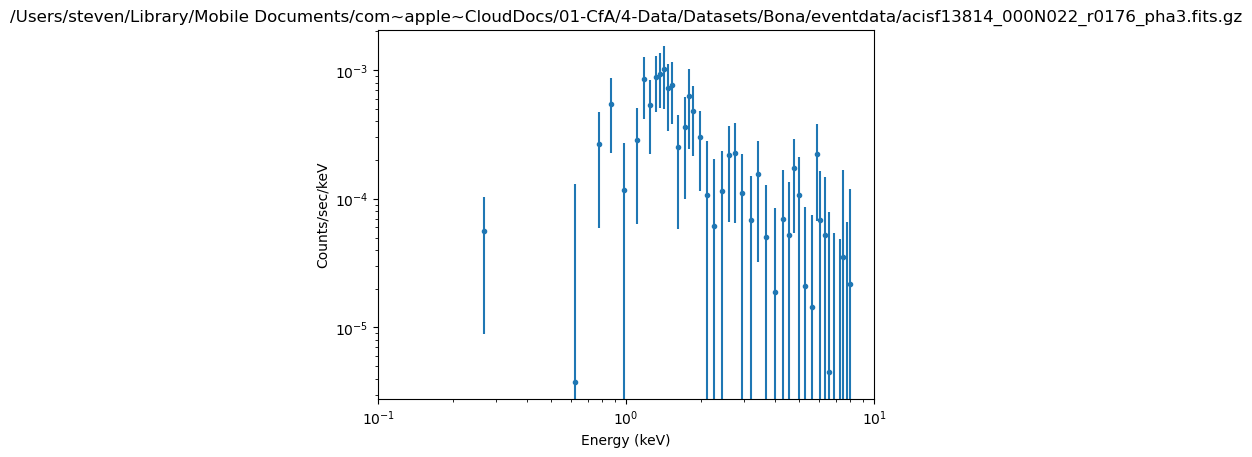

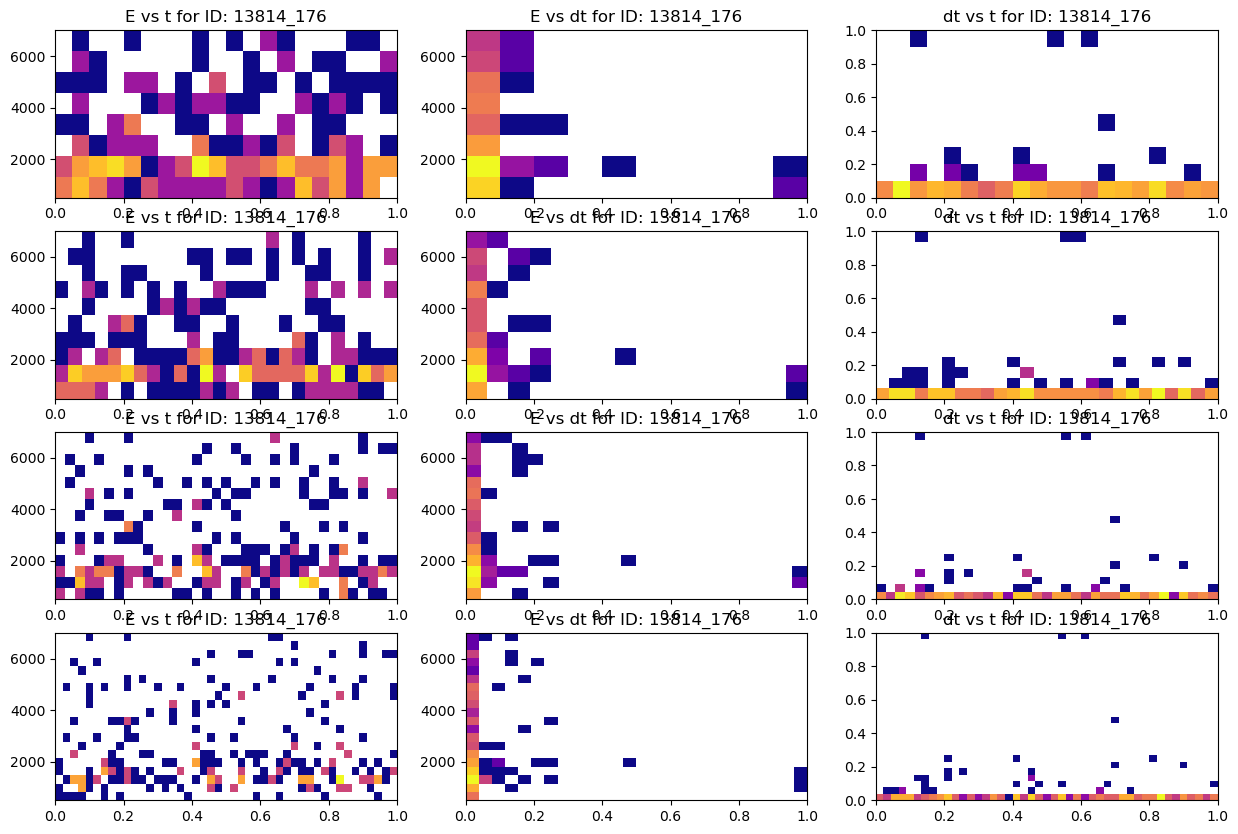

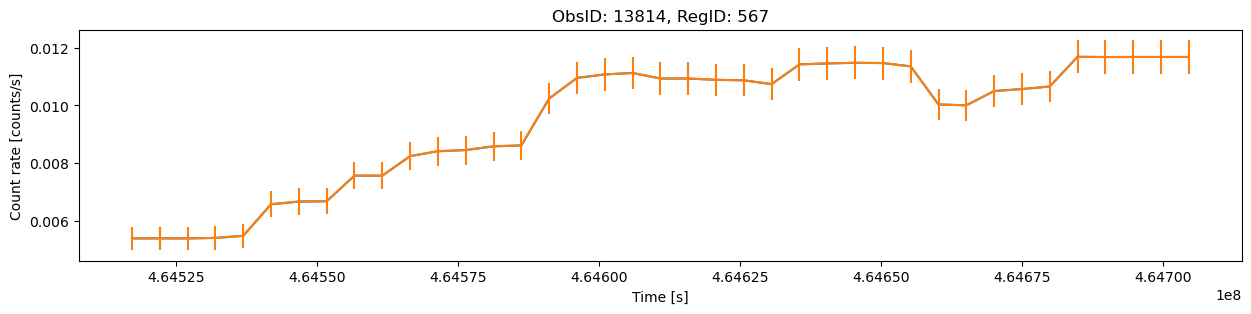

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13814_000N021_r0567_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13814_000N021_r0567_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf13814_000N022_r0567_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


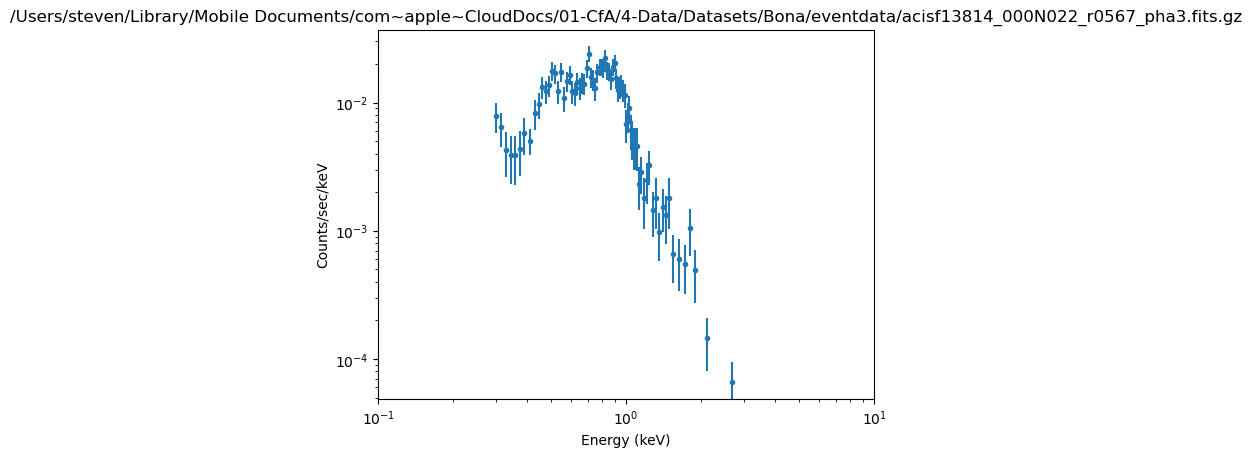

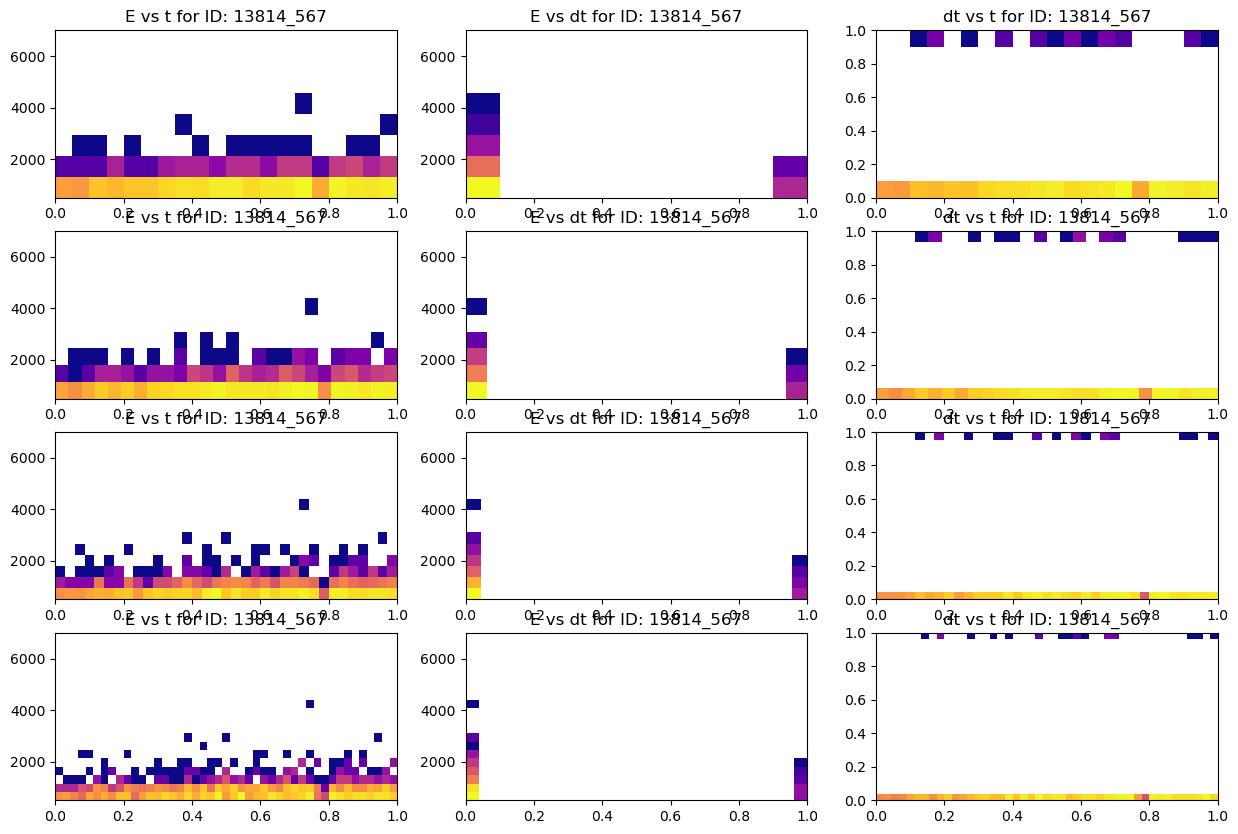

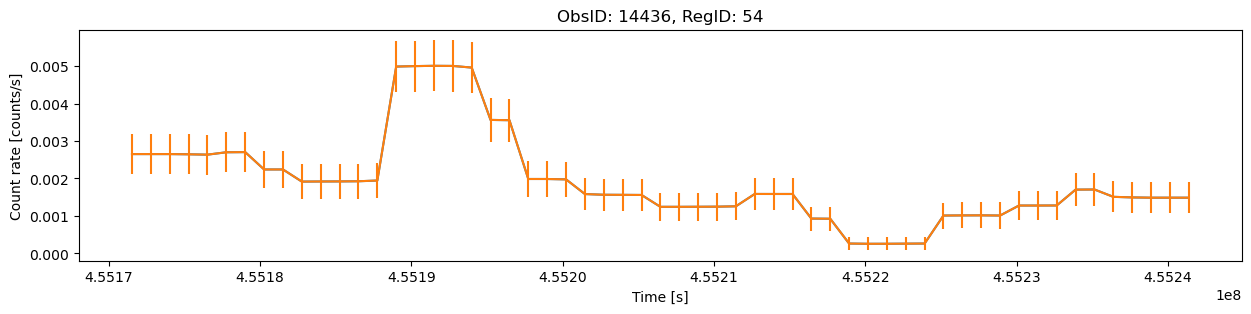

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14436_001N021_r0054_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14436_001N021_r0054_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14436_001N022_r0054_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


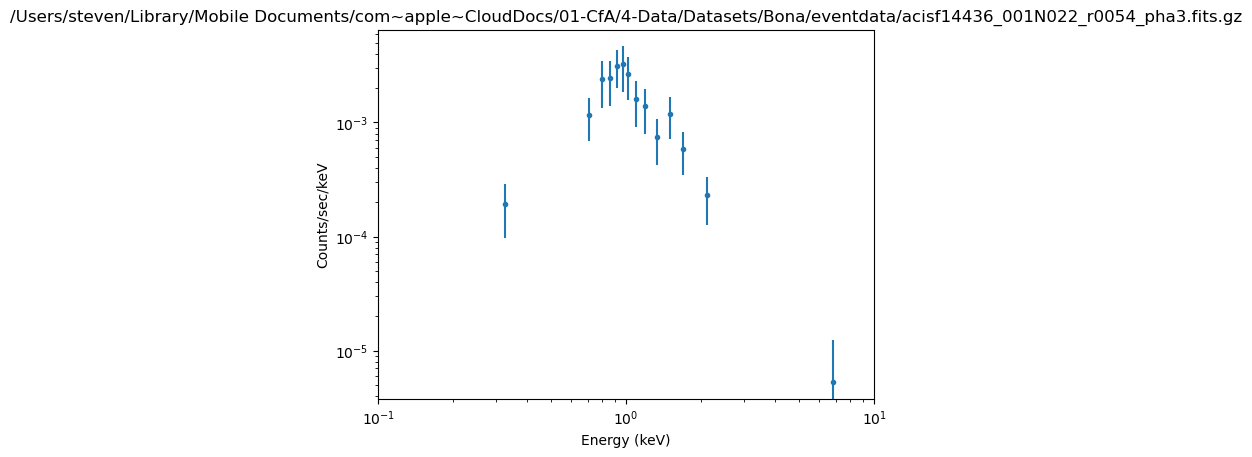

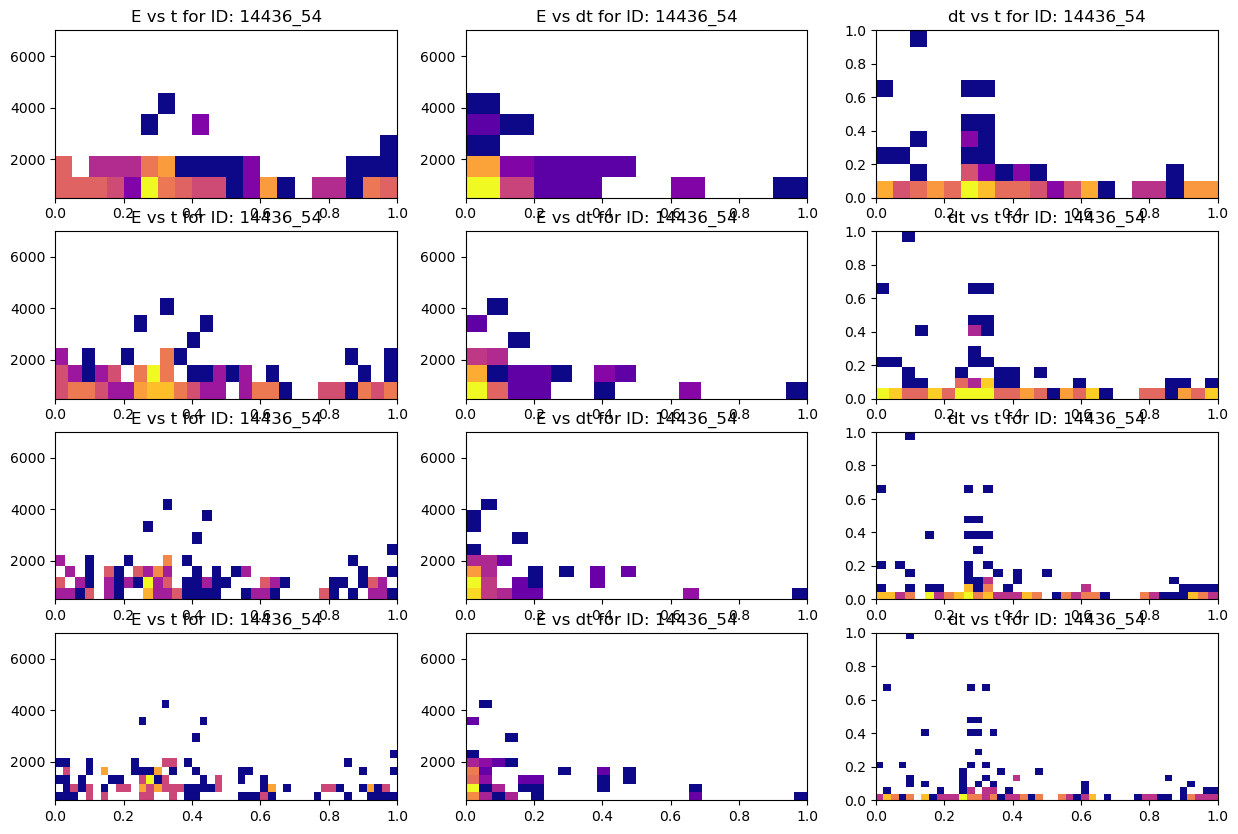

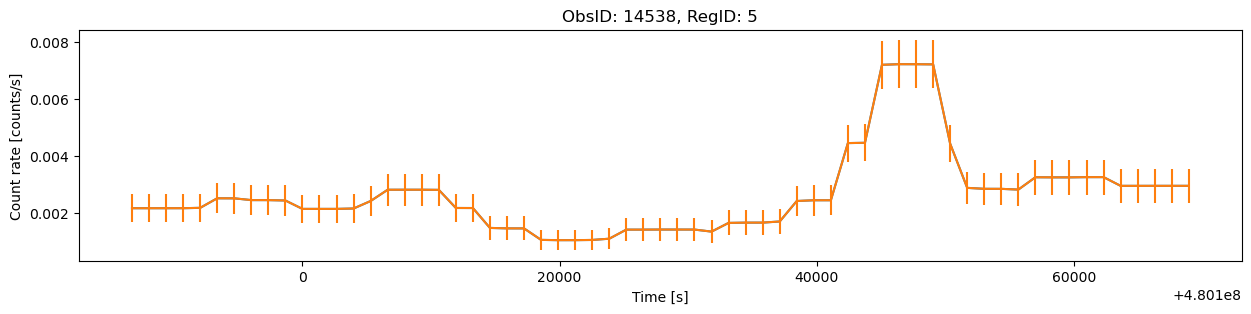

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14538_001N022_r0005_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14538_001N022_r0005_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf14538_001N023_r0005_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


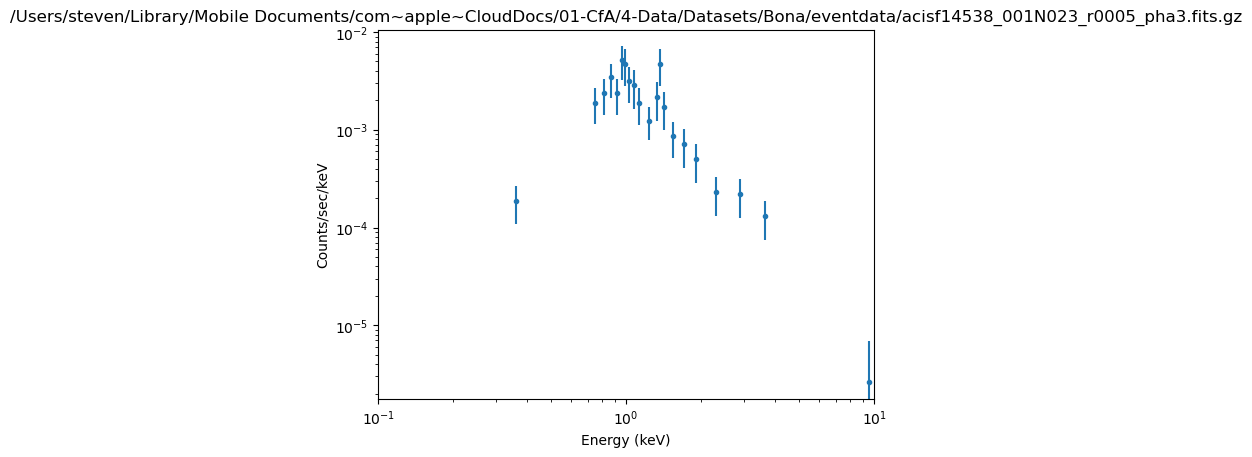

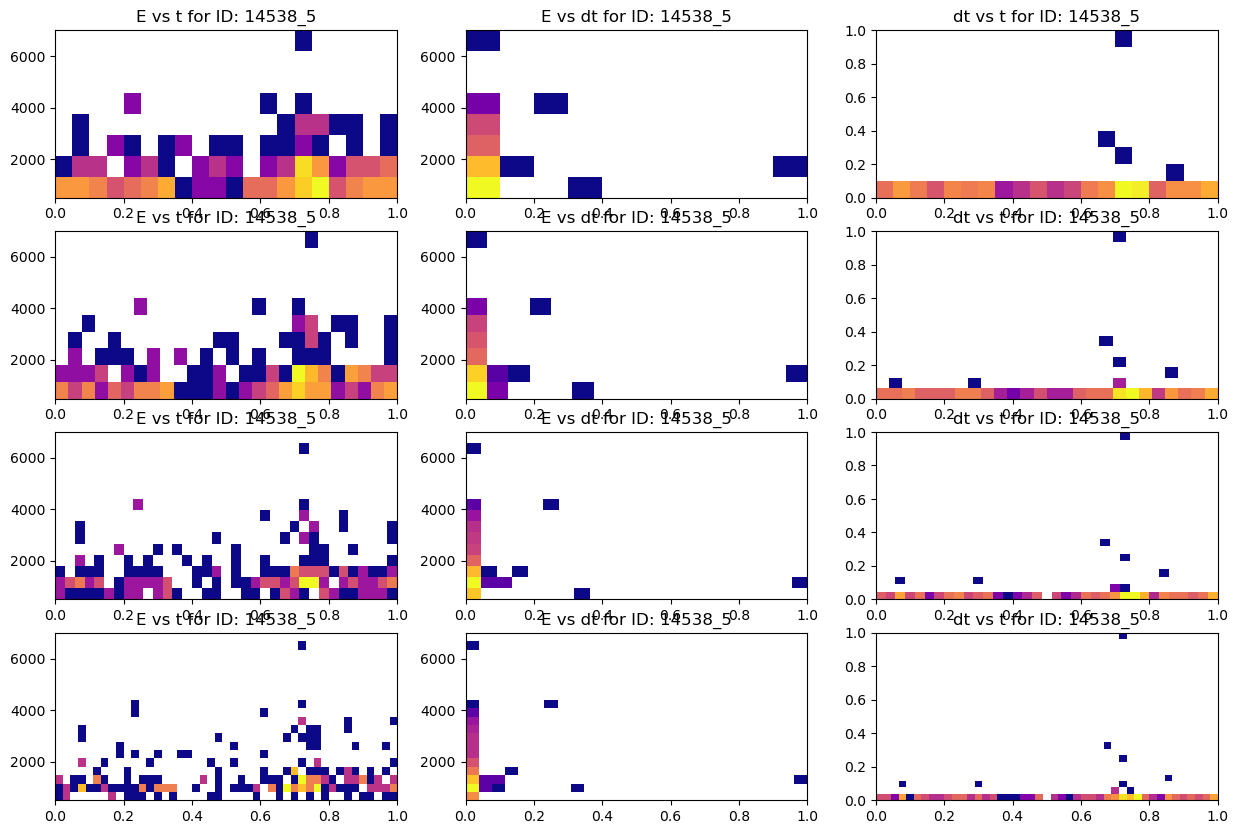

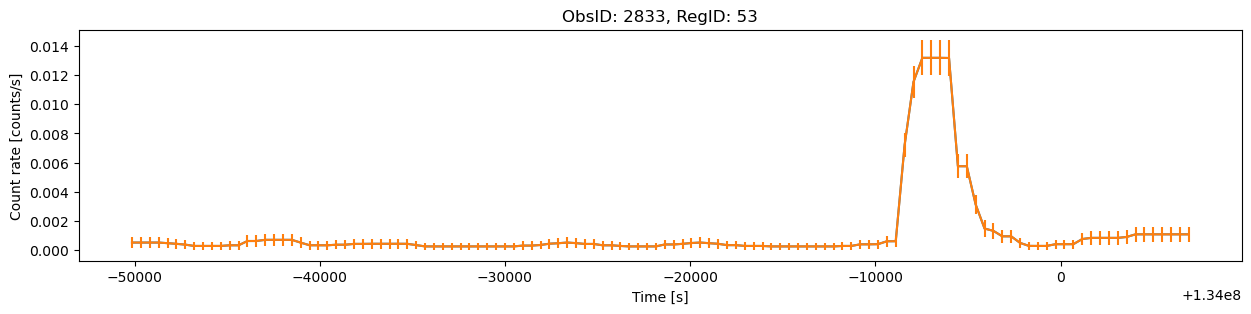

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf02833_001N021_r0053_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf02833_001N021_r0053_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf02833_001N022_r0053_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


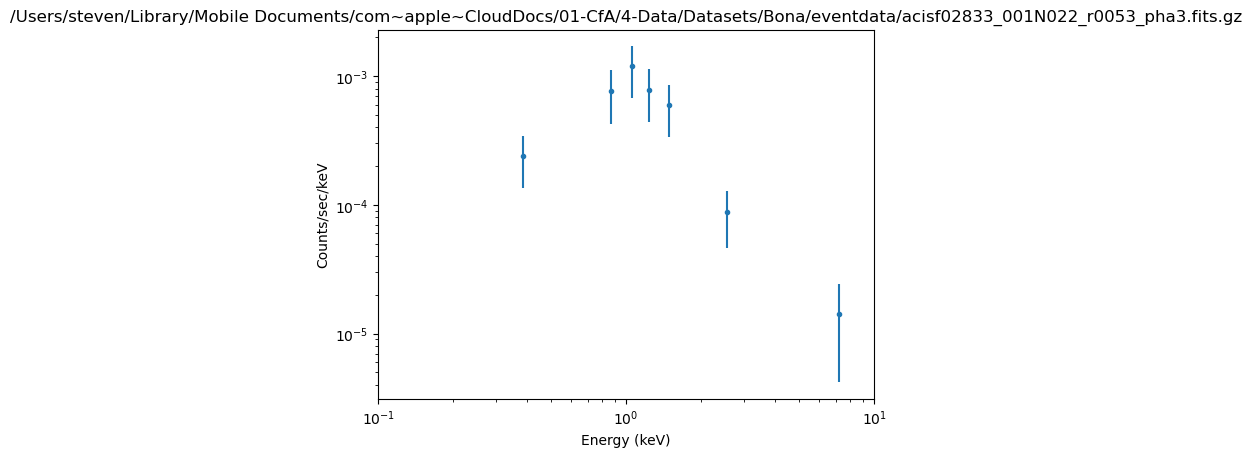

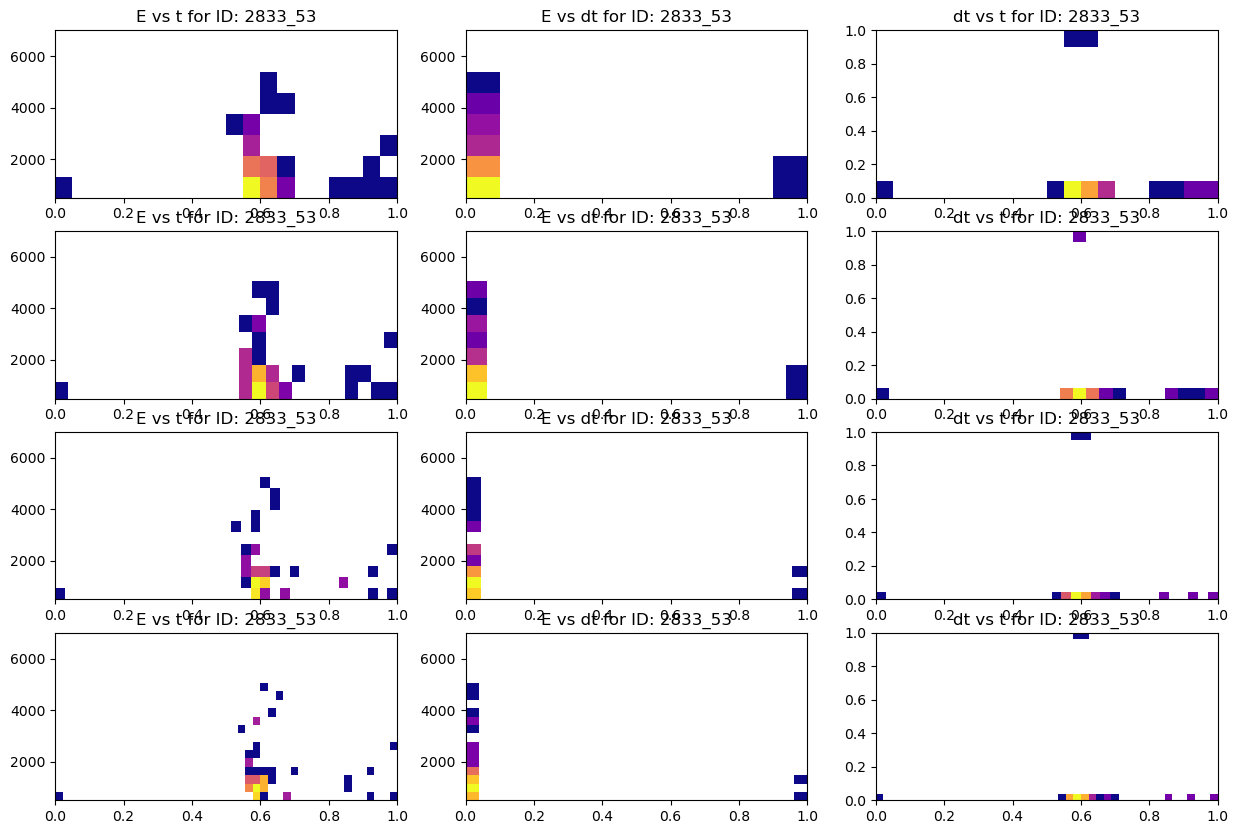

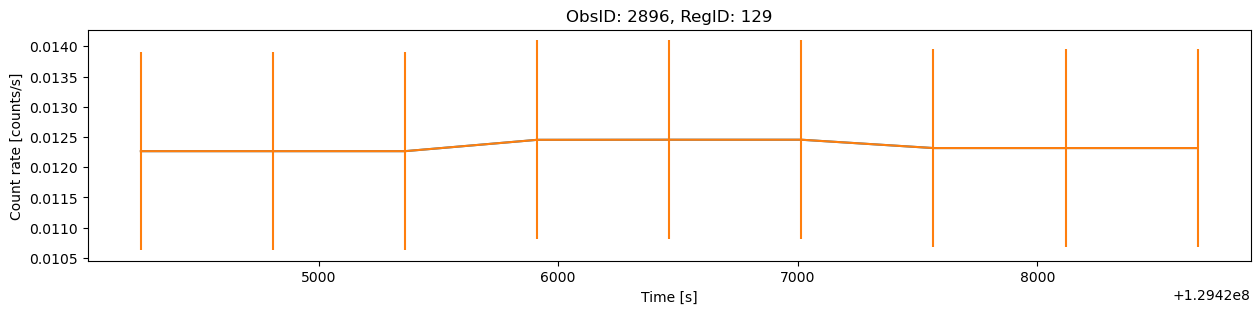

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf02896_000N022_r0129_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf02896_000N022_r0129_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf02896_000N023_r0129_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


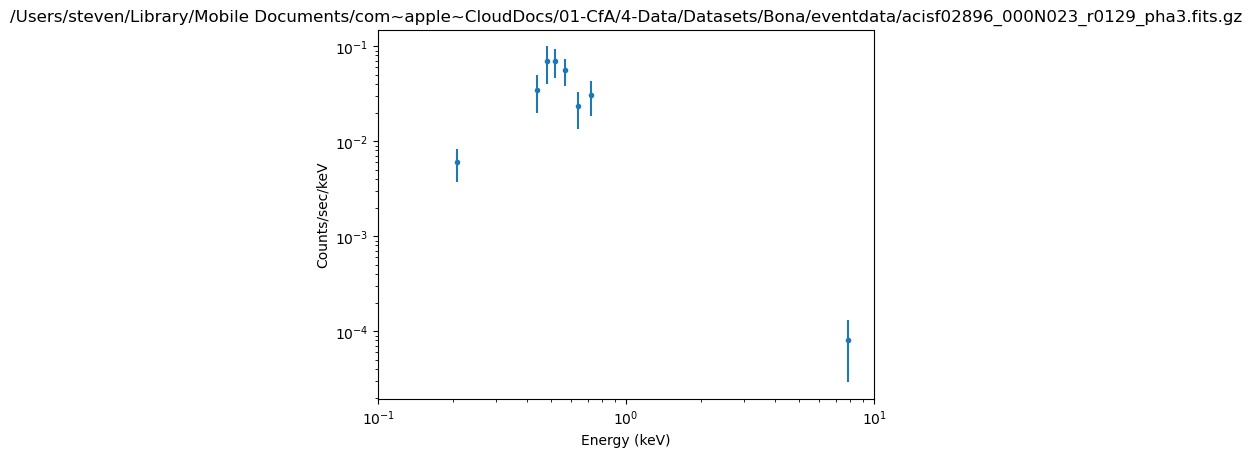

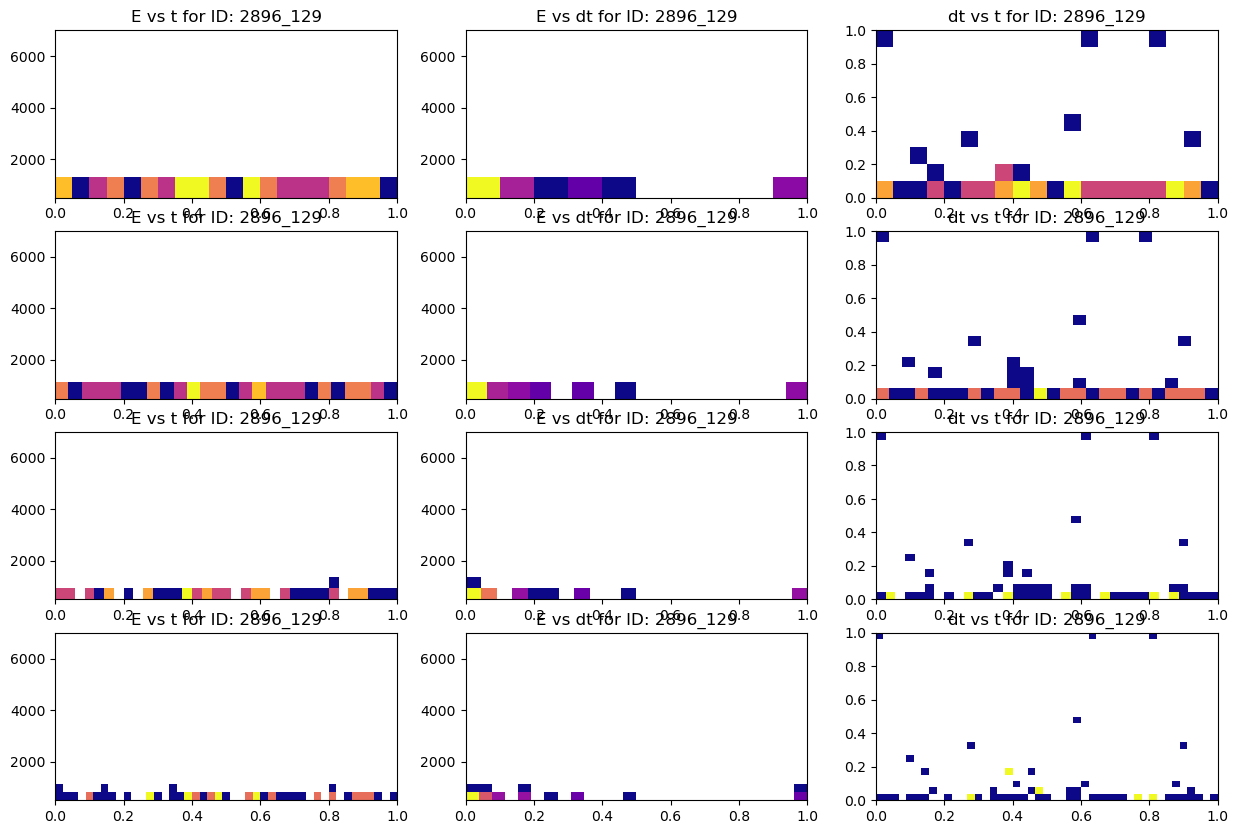

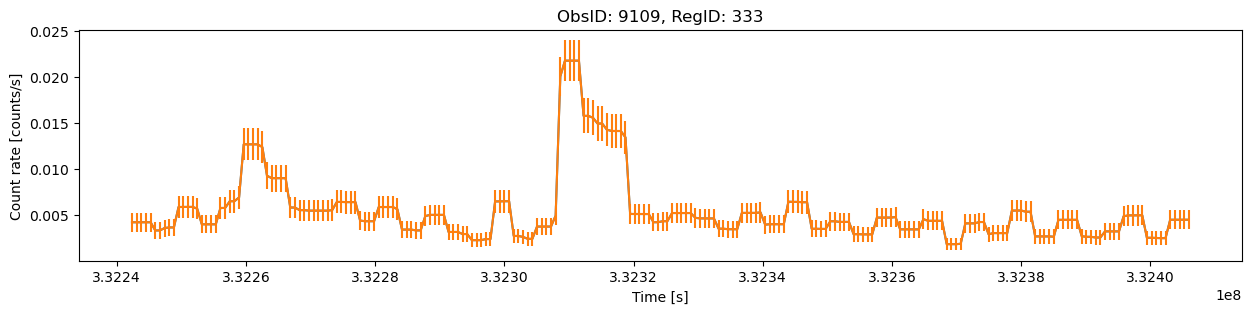

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf09109_000N022_r0333_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf09109_000N022_r0333_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf09109_000N023_r0333_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


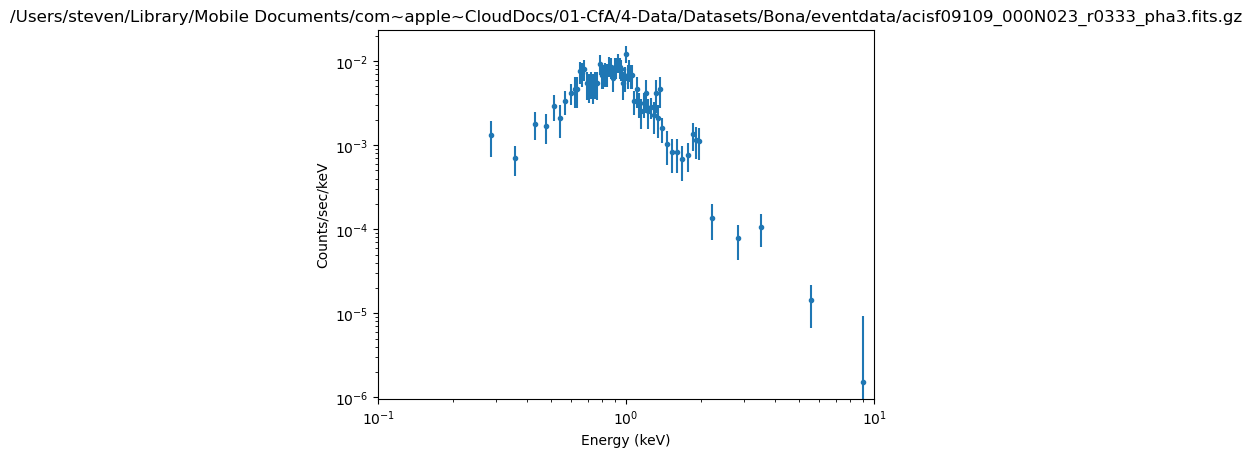

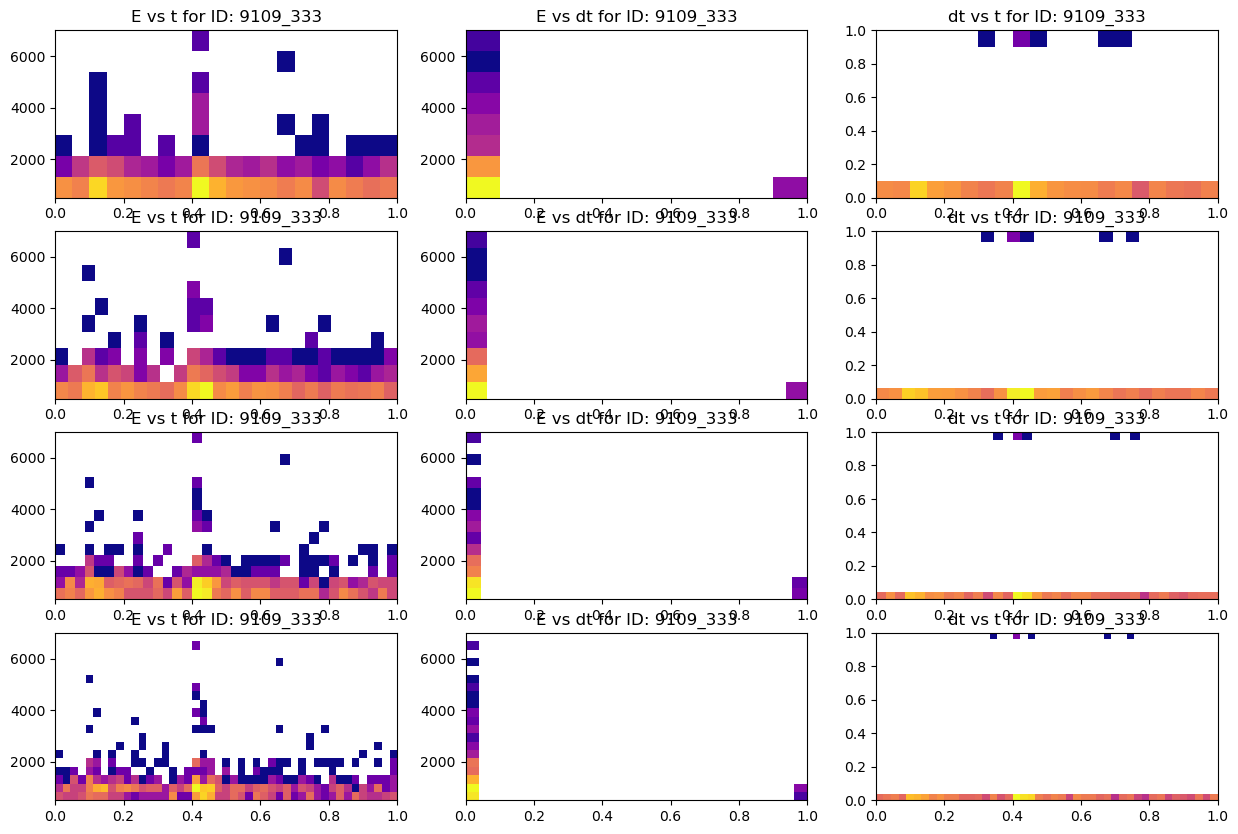

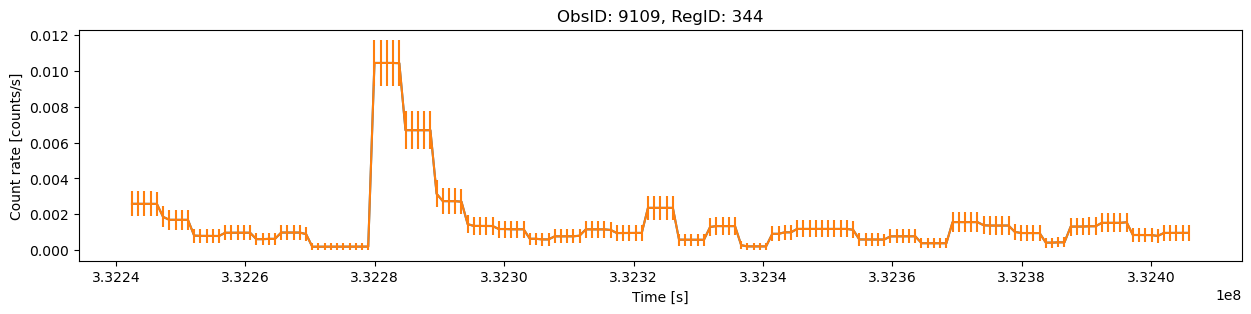

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf09109_000N021_r0344_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf09109_000N021_r0344_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/01-CfA/4-Data/Datasets/Bona/eventdata/acisf09109_000N022_r0344_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.292:7.9862 Energy (keV)


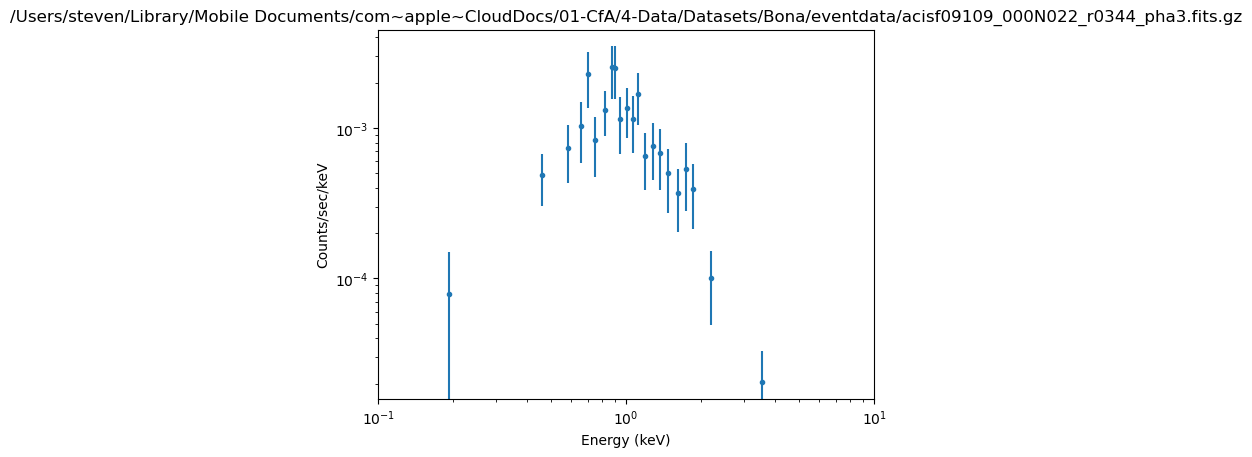

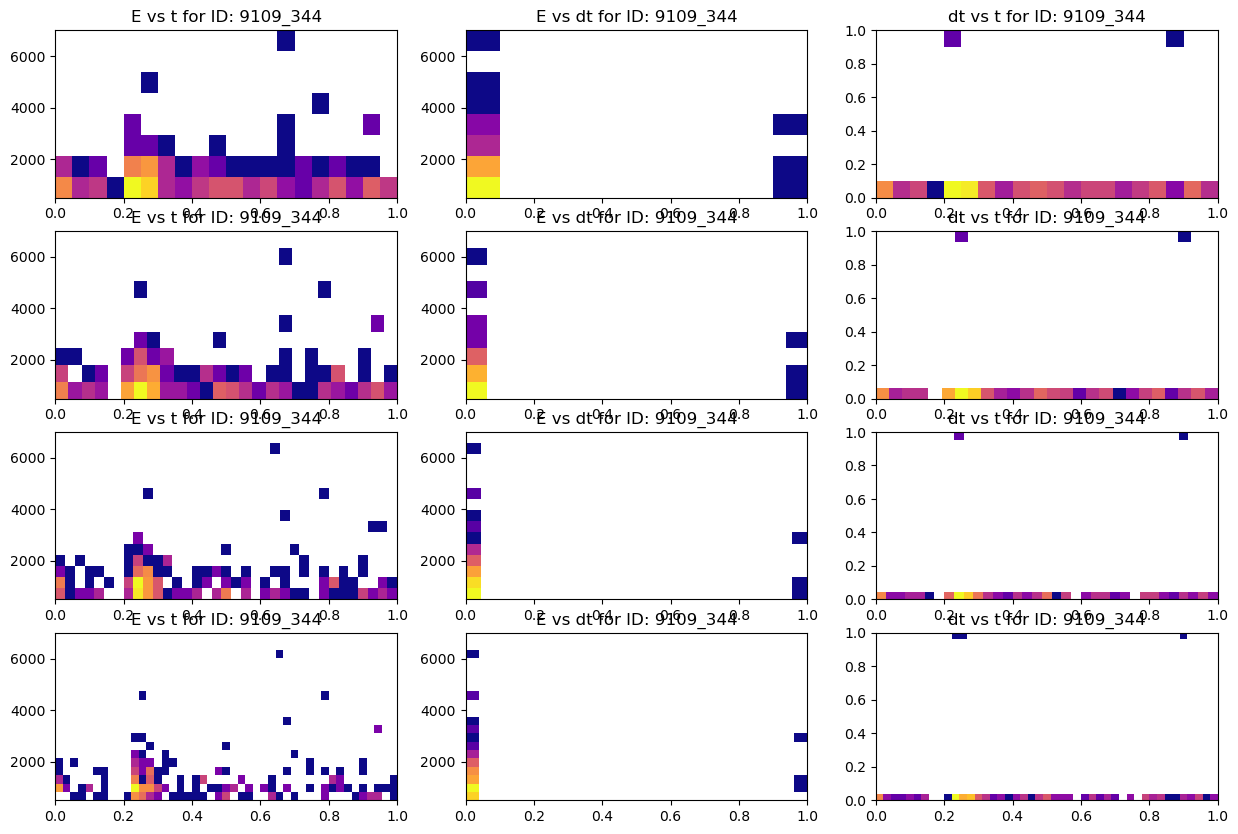

In [6]:
# Set ID
set_id = set_widget.value
#Settings
dt_axis_min = -4
dt_axis_max = 4

Emin = 500
Emax = 7000


nbins_dt50 = 10
nbins_E50 = 8
nbins_t50 = 20
nbins_dt75 = 16
nbins_E75 = 10
nbins_t75 = 26
nbins_dt90 = 22
nbins_E90 = 15
nbins_t90 = 35
nbins_dt95 = 26
nbins_E95 = 20
nbins_t95 = 45
# Loop over all eventfiles
for id_name, dfi in df_eventfiles_group:
    # Add delta_time column
    dfi["delta_time"] = dfi['time'].diff()
    # Remove first row as delta_time = nan
    dfi = dfi[dfi["delta_time"].notna()]
    # Add a constant value "pseudo-count" 0.1 to delta_time = 0 
    dfi["delta_time"] = dfi["delta_time"].apply(lambda dt: np.where(dt == 0, dt + 0.1, dt))
    # Eventfile length and duration for normalisation
    N = len(dfi) 
    T = max(dfi["time"])-min(dfi["time"])
    # Add dt column (with normalisations applied)
    dfi["dt"] = 1/(N * dfi["delta_time"]/T)
    dt_min = min(dfi["dt"])
    dt_max = max(dfi["dt"])
    dfi["dt"] = (dfi["dt"]- dt_min)/(dt_max-dt_min)
    # Add t column
    #dfi["t"] = np.log10((dfi["time"]-min(dfi["time"]))*N/T+0.0001)
    dfi["t"] = (dfi["time"]-min(dfi["time"]))/T
    t_min = min(dfi["t"])
    t_max = max(dfi["t"])
    #dfi["t"] = (dfi["t"]- t_min)/(t_max-t_min)
    # Add E column
    # dfi["E"] = 10**(dfi["energy"])
    dfi["E"] = dfi["energy"]
    # IDs
    obsid = id_name.split("_")[0]
    regid = id_name.split("_")[1]
    # Lightcurve
    plt.subplots(figsize=(15, 3))
    lc_filename = [lcurve for lcurve in glob.iglob(f'{global_path}/{set_id}/eventdata/acisf*lc3.fits.gz') if str(obsid) in lcurve and str(regid) in lcurve][0]
    pha_filename = [spec for spec in glob.iglob(f'{global_path}/{set_id}/eventdata/acisf*pha3.fits.gz') if str(obsid) in spec and str(regid) in spec][0]
    with fits.open(lc_filename) as hdul_lc:
        lc3 = hdul_lc[1].data
        bg3 = hdul_lc[2].data
        plt.plot(lc3['Time'],lc3['COUNT_RATE'])
        plt.xlabel('Time [s]')
        plt.ylabel('Count rate [counts/s]')
        plt.title(f'ObsID: {obsid}, RegID: {regid}')
        plt.errorbar(lc3['Time'],lc3['COUNT_RATE'],lc3['COUNT_RATE_ERR'])
        plt.show()
    
    ui.load_pha(pha_filename)
    ui.ignore('0.:0.5,8.0:')
    ui.subtract()
    ui.notice_id(1,0.3,7.)
    ui.group_counts(10)
    ui.set_ylog()
    ui.set_xlog()
    ui.plot_data()
    plt.xlim(1E-1,10)  
    plt.show()

    # Create histogram representation
    #hist = plt.hist2d(df["dt"],df["E"],range = [[dt_axis_min, dt_axis_max],[np.log10(500.), np.log10(7000.)]],bins=(nbins_dt,nbins_E),norm=LogNorm(),cmap = 'plasma', density = True) 
    fig,axs=plt.subplots(4,3,figsize=(15,10))

    plt.subplot(4, 3, 1)
    plt.title(f'E vs t for ID: {id_name}')
    Et50 = plt.hist2d(dfi["t"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_t50,nbins_E50),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 2)
    plt.title(f'E vs dt for ID: {id_name}')
    Edt50 = plt.hist2d(dfi["dt"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_dt50,nbins_E50),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 3)
    plt.title(f'dt vs t for ID: {id_name}')
    dtt50 = plt.hist2d(dfi["t"],dfi["dt"],range = [[0,1],[0,1]],bins=(nbins_t50,nbins_dt50),norm=LogNorm(),cmap = 'plasma') 
    
    plt.subplot(4, 3, 4)
    plt.title(f'E vs t for ID: {id_name}')
    Et75 = plt.hist2d(dfi["t"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_t75,nbins_E75),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 5)
    plt.title(f'E vs dt for ID: {id_name}')
    Edt75 = plt.hist2d(dfi["dt"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_dt75,nbins_E75),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 6)
    plt.title(f'dt vs t for ID: {id_name}')
    dtt75 = plt.hist2d(dfi["t"],dfi["dt"],range = [[0,1],[0,1]],bins=(nbins_t75,nbins_dt75),norm=LogNorm(),cmap = 'plasma') 

    plt.subplot(4, 3, 7)
    plt.title(f'E vs t for ID: {id_name}')
    Et90 = plt.hist2d(dfi["t"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_t90,nbins_E90),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 8)
    plt.title(f'E vs dt for ID: {id_name}')
    Edt90 = plt.hist2d(dfi["dt"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_dt90,nbins_E90),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 9)
    plt.title(f'dt vs t for ID: {id_name}')
    dtt90 = plt.hist2d(dfi["t"],dfi["dt"],range = [[0,1],[0,1]],bins=(nbins_t90,nbins_dt90),norm=LogNorm(),cmap = 'plasma') 

    plt.subplot(4, 3, 10)
    plt.title(f'E vs t for ID: {id_name}')
    Et95 = plt.hist2d(dfi["t"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_t95,nbins_E95),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 11)
    plt.title(f'E vs dt for ID: {id_name}')
    Edt95 = plt.hist2d(dfi["dt"],dfi["E"],range = [[0,1],[Emin, Emax]],bins=(nbins_dt95,nbins_E95),norm=LogNorm(),cmap = 'plasma') 
    plt.subplot(4, 3, 12)
    plt.title(f'dt vs t for ID: {id_name}')
    dtt95 = plt.hist2d(dfi["t"],dfi["dt"],range = [[0,1],[0,1]],bins=(nbins_t95,nbins_dt95),norm=LogNorm(),cmap = 'plasma') 

    plt.show()
    
   

    #fig = plt.imshow(x2.T)
      
#np.save(f'{data_folder_path}/edthist-{set_id[0]}.csv',x_features2,allow_pickle=True)